In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import pandas_bokeh
# pandas_bokeh.output_notebook()

import scikitplot as skplt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [2]:
#importing datasets

cab_df = pd.read_csv("Cab_Data.csv")
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [3]:
cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There are no missing values in this dataset.

In [4]:
cab_df.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

The `Date of Travel` is of serial number format. Extracting data information from this column.

In [5]:
from datetime import datetime
import xlrd

In [6]:
%%time
dates = [
    pd.to_datetime(xlrd.xldate_as_datetime(date, 0)) for date in cab_df['Date of Travel']
] 

Wall time: 26.4 s


In [7]:
cab_df['Travel_Date'] = dates

In [8]:
cab_df.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip Travel_Date  
0         370.95       313.635  2016-01-08  
1         358.52       334.854  2016-01-06  
2         125.20        97.632  2016-01-02  
3         377.40       351.602  2016-01-07  
4         114.62        97.776  2016-01-03

In [9]:
#Dropping 'Date of Travel' column
cab_df.drop('Date of Travel', axis = 1, inplace = True)

In [10]:
cab_df.head()

Transaction ID   Company        City  KM Travelled  Price Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost of Trip Travel_Date  
0       313.635  2016-01-08  
1       334.854  2016-01-06  
2        97.632  2016-01-02  
3       351.602  2016-01-07  
4        97.776  2016-01-03

In [11]:
#Import city dataset
city_df = pd.read_csv('City.csv')
city_df

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [12]:
#checking if Cities in city_df are in cab_df

np.setdiff1d(city_df.City, cab_df.City)

array(['SAN FRANCISCO CA'], dtype=object)

Travel information regarding travelers from San Francisco are not present in the cab_df dataset. Therefore, when both cab_df and city_df will be inner-joined based on the city column, the row containing San Francisco city in city_df will be dropped.

In [13]:
df1 = pd.merge(cab_df, city_df, on = 'City')

In [14]:
# importing Transaction ID dataset

trans_df = pd.read_csv('Transaction_ID.csv')
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [15]:
trans_df.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [16]:
#Checking for Transaction ID's not in df1 dataset

len(np.setdiff1d(trans_df['Transaction ID'], df1['Transaction ID']))

80706

There are about 80,706 transaction ID's not in the df1 dataset. These will be dropped when joining trans_df with the df1 dataset

In [17]:
df2 = pd.merge(df1, trans_df, on = 'Transaction ID')

In [18]:
# importing customer ID df

cust_df = pd.read_csv('Customer_ID.csv')
cust_df.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [19]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
# Checking for Customer ID's not in df2 dataset

len(np.setdiff1d(cust_df['Customer ID'], df2['Customer ID']))

3023

Around 3023 Customer ID's are not in the df2 dataset. These will be dropped when cust_df will be joined with the df2 dataset. 

In [21]:
full_df = pd.merge(df2, cust_df, on = 'Customer ID')
full_df.head()

Transaction ID     Company        City  KM Travelled  Price Charged  \
0        10000011    Pink Cab  ATLANTA GA         30.45         370.95   
1        10351127  Yellow Cab  ATLANTA GA         26.19         598.70   
2        10412921  Yellow Cab  ATLANTA GA         42.55         792.05   
3        10000012    Pink Cab  ATLANTA GA         28.62         358.52   
4        10320494  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip Travel_Date Population     Users  Customer ID Payment_Mode  \
0      313.6350  2016-01-08   814,885    24,701         29290         Card   
1      317.4228  2018-07-21   814,885    24,701         29290         Cash   
2      597.4020  2018-11-23   814,885    24,701         29290         Card   
3      334.8540  2016-01-06   814,885    24,701         27703         Card   
4      467.1192  2018-04-21   814,885    24,701         27703         Card   

  Gender  Age  Income (USD/Month)  
0   Male   28               10813  
1   Male   28               10813  
2   Male   28               10813  
3   Male   27                9237  
4   Male   27                9237

In [22]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Company             359392 non-null  object        
 2   City                359392 non-null  object        
 3   KM Travelled        359392 non-null  float64       
 4   Price Charged       359392 non-null  float64       
 5   Cost of Trip        359392 non-null  float64       
 6   Travel_Date         359392 non-null  datetime64[ns]
 7   Population          359392 non-null  object        
 8   Users               359392 non-null  object        
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [23]:
#Checking for NA's

full_df.isna().sum()

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Travel_Date           0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

We have joined all datasets and created a master datasets comprising of columns from all of the datasets.

Next, splitting the `City` column to city and state columns. Fortunatly, there already exists a forum on the internet with a list of all US States abbreviations in a list format.https://snipplr.com/view/50728/list-of-us-state-abbreviations 

In [24]:
%%time
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(full_df)):
    if full_df.City[i].split()[~0] in US_States:
        city.append(full_df.City[i].split(f' {full_df.City[i].split()[~0]}')[0])
        state.append(full_df.City[i].split()[~0])
    else:
        city.append(full_df.City[i])
        state.append(np.nan)

Wall time: 13.9 s


In [25]:
full_df['City'] = city
full_df['State'] = state

full_df.head()

Transaction ID     Company     City  KM Travelled  Price Charged  \
0        10000011    Pink Cab  ATLANTA         30.45         370.95   
1        10351127  Yellow Cab  ATLANTA         26.19         598.70   
2        10412921  Yellow Cab  ATLANTA         42.55         792.05   
3        10000012    Pink Cab  ATLANTA         28.62         358.52   
4        10320494  Yellow Cab  ATLANTA         36.38         721.10   

   Cost of Trip Travel_Date Population     Users  Customer ID Payment_Mode  \
0      313.6350  2016-01-08   814,885    24,701         29290         Card   
1      317.4228  2018-07-21   814,885    24,701         29290         Cash   
2      597.4020  2018-11-23   814,885    24,701         29290         Card   
3      334.8540  2016-01-06   814,885    24,701         27703         Card   
4      467.1192  2018-04-21   814,885    24,701         27703         Card   

  Gender  Age  Income (USD/Month) State  
0   Male   28               10813    GA  
1   Male   28               10813    GA  
2   Male   28               10813    GA  
3   Male   27                9237    GA  
4   Male   27                9237    GA

In [26]:
print(full_df.City.unique())
print()
full_df.State.unique()

['ATLANTA' 'AUSTIN' 'BOSTON' 'CHICAGO' 'DALLAS' 'DENVER' 'LOS ANGELES'
 'MIAMI' 'NASHVILLE' 'NEW YORK' 'ORANGE COUNTY' 'PHOENIX' 'PITTSBURGH'
 'SACRAMENTO' 'SAN DIEGO' 'SEATTLE' 'SILICON VALLEY' 'TUCSON' 'WASHINGTON']



array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', nan, 'AZ',
       'PA', 'WA', 'DC'], dtype=object)

In [27]:
full_df.isna().sum()

Transaction ID            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Travel_Date               0
Population                0
Users                     0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
State                 12501
dtype: int64

There are about 12501 observations with missing states columns. Checking which cities have missing states. 

In [28]:
full_df[full_df.State.isna()]['City'].unique()

array(['ORANGE COUNTY', 'SILICON VALLEY'], dtype=object)

Since both Orange County and Silicon Valley are located within the State of California, I will impute the missing values in the `State`column belonging to these cities as 'CA' (California)

In [29]:
full_df.fillna('CA', inplace = True)

In [30]:
full_df.isna().sum()

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Travel_Date           0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
State                 0
dtype: int64

In [31]:
#Checking for duplicated observation or columns
full_df.duplicated().sum() #None

0

In [32]:
#Replacing spaces in columns names with _

full_df.columns = [col.strip().replace(' ', '_').lower() for col in full_df.columns]
print(full_df.columns)

Index(['transaction_id', 'company', 'city', 'km_travelled', 'price_charged',
       'cost_of_trip', 'travel_date', 'population', 'users', 'customer_id',
       'payment_mode', 'gender', 'age', 'income_(usd/month)', 'state'],
      dtype='object')


In [33]:
#Sorting the data based on date of travel and transaction ID.

full_df.sort_values(['travel_date', 'transaction_id'], ignore_index=True, inplace = True)

In [34]:
full_df

transaction_id     company        city  km_travelled  price_charged  \
0             10000013    Pink Cab     ATLANTA          9.04         125.20   
1             10000029    Pink Cab      BOSTON         21.34         324.21   
2             10000030    Pink Cab      BOSTON         41.30         646.06   
3             10000041    Pink Cab     CHICAGO         35.02         598.43   
4             10000045    Pink Cab     CHICAGO          3.24          48.04   
...                ...         ...         ...           ...            ...   
359387        10439960  Yellow Cab  WASHINGTON         33.93         474.47   
359388        10439984  Yellow Cab  WASHINGTON         40.00         641.78   
359389        10440028  Yellow Cab  WASHINGTON         26.22         405.25   
359390        10440034  Yellow Cab  WASHINGTON         34.68         505.38   
359391        10440093  Yellow Cab  WASHINGTON          4.32          60.41   

        cost_of_trip travel_date   population      users  customer_id  \
0            97.6320  2016-01-02     814,885     24,701         28712   
1           226.2040  2016-01-02     248,968     80,021         58925   
2           454.3000  2016-01-02     248,968     80,021         58551   
3           406.2320  2016-01-02   1,955,130    164,468          4289   
4            33.6960  2016-01-02   1,955,130    164,468          5734   
...              ...         ...          ...        ...          ...   
359387      411.2316  2018-12-31     418,859    127,001         52449   
359388      484.8000  2018-12-31     418,859    127,001         51614   
359389      327.2256  2018-12-31     418,859    127,001         52389   
359390      470.2608  2018-12-31     418,859    127,001         51877   
359391       55.4688  2018-12-31     418,859    127,001         53810   

       payment_mode  gender  age  income_(usd/month) state  
0              Cash    Male   53               11242    GA  
1              Card    Male   38               26550    MA  
2              Card    Male   25               21734    MA  
3              Card    Male   19               28719    IL  
4              Card    Male   23               22475    IL  
...             ...     ...  ...                 ...   ...  
359387         Card  Female   40               23569    DC  
359388         Card  Female   55               12279    DC  
359389         Card  Female   29                5568    DC  
359390         Cash    Male   46               16993    DC  
359391         Cash    Male   23               21455    DC  

[359392 rows x 15 columns]

In [35]:
#checking for any duplicated observations

print(cust_df.duplicated().sum())
print(trans_df.duplicated().sum())
print(cab_df.duplicated().sum())

#None

0
0
0


##### Now the dataset is complete and ready for EDA

In [36]:
# full_df.to_csv('full_df.csv', index = False)

# EDA

In [37]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      359392 non-null  int64         
 1   company             359392 non-null  object        
 2   city                359392 non-null  object        
 3   km_travelled        359392 non-null  float64       
 4   price_charged       359392 non-null  float64       
 5   cost_of_trip        359392 non-null  float64       
 6   travel_date         359392 non-null  datetime64[ns]
 7   population          359392 non-null  object        
 8   users               359392 non-null  object        
 9   customer_id         359392 non-null  int64         
 10  payment_mode        359392 non-null  object        
 11  gender              359392 non-null  object        
 12  age                 359392 non-null  int64         
 13  income_(usd/month)  359392 no

Both `population` and `users` columns are of object data type. Converting these columns to numeric

In [38]:
full_df.population[0], full_df.users[0]
#There are commas inside figures in population and users.

(' 814,885 ', ' 24,701 ')

In [39]:
full_df.population = [full_df.population[i].replace(",", "") for i in range(len(full_df))]
full_df.users = [full_df.users[i].replace(",", "") for i in range(len(full_df))]

In [40]:
full_df

transaction_id     company        city  km_travelled  price_charged  \
0             10000013    Pink Cab     ATLANTA          9.04         125.20   
1             10000029    Pink Cab      BOSTON         21.34         324.21   
2             10000030    Pink Cab      BOSTON         41.30         646.06   
3             10000041    Pink Cab     CHICAGO         35.02         598.43   
4             10000045    Pink Cab     CHICAGO          3.24          48.04   
...                ...         ...         ...           ...            ...   
359387        10439960  Yellow Cab  WASHINGTON         33.93         474.47   
359388        10439984  Yellow Cab  WASHINGTON         40.00         641.78   
359389        10440028  Yellow Cab  WASHINGTON         26.22         405.25   
359390        10440034  Yellow Cab  WASHINGTON         34.68         505.38   
359391        10440093  Yellow Cab  WASHINGTON          4.32          60.41   

        cost_of_trip travel_date population     users  customer_id  \
0            97.6320  2016-01-02    814885     24701         28712   
1           226.2040  2016-01-02    248968     80021         58925   
2           454.3000  2016-01-02    248968     80021         58551   
3           406.2320  2016-01-02   1955130    164468          4289   
4            33.6960  2016-01-02   1955130    164468          5734   
...              ...         ...        ...       ...          ...   
359387      411.2316  2018-12-31    418859    127001         52449   
359388      484.8000  2018-12-31    418859    127001         51614   
359389      327.2256  2018-12-31    418859    127001         52389   
359390      470.2608  2018-12-31    418859    127001         51877   
359391       55.4688  2018-12-31    418859    127001         53810   

       payment_mode  gender  age  income_(usd/month) state  
0              Cash    Male   53               11242    GA  
1              Card    Male   38               26550    MA  
2              Card    Male   25               21734    MA  
3              Card    Male   19               28719    IL  
4              Card    Male   23               22475    IL  
...             ...     ...  ...                 ...   ...  
359387         Card  Female   40               23569    DC  
359388         Card  Female   55               12279    DC  
359389         Card  Female   29                5568    DC  
359390         Cash    Male   46               16993    DC  
359391         Cash    Male   23               21455    DC  

[359392 rows x 15 columns]

In [41]:
full_df.population[0]

' 814885 '

In [42]:
full_df.population = full_df.population.astype('int64')
full_df.users = full_df.users.astype('int64')

In [43]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      359392 non-null  int64         
 1   company             359392 non-null  object        
 2   city                359392 non-null  object        
 3   km_travelled        359392 non-null  float64       
 4   price_charged       359392 non-null  float64       
 5   cost_of_trip        359392 non-null  float64       
 6   travel_date         359392 non-null  datetime64[ns]
 7   population          359392 non-null  int64         
 8   users               359392 non-null  int64         
 9   customer_id         359392 non-null  int64         
 10  payment_mode        359392 non-null  object        
 11  gender              359392 non-null  object        
 12  age                 359392 non-null  int64         
 13  income_(usd/month)  359392 no

### Visualizing Demographics

I will visualize the total population of both users and non-users of cab servies by state.

In [44]:
full_df.groupby(['state', 'city']).mean()[['population', 'users']]

population     users
state city                                
AZ    PHOENIX           943999.0    6133.0
      TUCSON            631442.0    5712.0
CA    LOS ANGELES      1595037.0  144132.0
      ORANGE COUNTY    1030185.0   12994.0
      SACRAMENTO        545776.0    7044.0
      SAN DIEGO         959307.0   69995.0
      SILICON VALLEY   1177609.0   27247.0
CO    DENVER            754233.0   12421.0
DC    WASHINGTON        418859.0  127001.0
FL    MIAMI            1339155.0   17675.0
GA    ATLANTA           814885.0   24701.0
IL    CHICAGO          1955130.0  164468.0
MA    BOSTON            248968.0   80021.0
NY    NEW YORK         8405837.0  302149.0
PA    PITTSBURGH        542085.0    3643.0
TN    NASHVILLE         327225.0    9270.0
TX    AUSTIN            698371.0   14978.0
      DALLAS            942908.0   22157.0
WA    SEATTLE           671238.0   25063.0

In [45]:
demograph = full_df.groupby(['state', 'city']).mean()[['population', 'users']].sum(level = 0)

In [46]:
demograph['non-users'] = demograph['population'] - demograph['users']

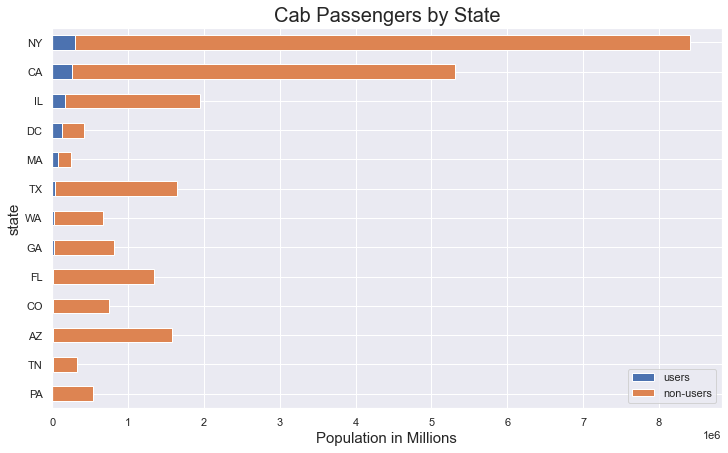

In [47]:
demograph.sort_values(['users', 'population'])[['users', 'non-users']].plot(kind = 'barh', 
                                                                 stacked = True, 
                                                                 figsize = (12, 7), 
                                                                 title = "Cab Passengers by State");

plt.xlabel("Population in Millions");

The state of New York has the highest population of approximatly 8.5 million followed California (around 5.3 million). Both of these states also have the highest number of users, follwed by Illanois, DC and Massachusetts.  

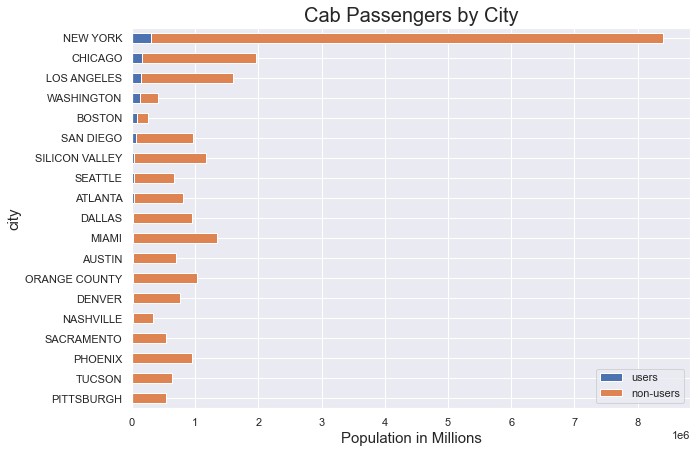

In [48]:
#Visualizing at City level

city_demog = full_df.groupby(['city']).mean()[['population', 'users']].sum(level = 0)

city_demog['non-users'] = city_demog['population'] - city_demog['users']

city_demog.sort_values(['users', 'population'])[['users', 'non-users']].\
                plot(kind = 'barh', stacked = True, figsize = (10, 7), title = "Cab Passengers by City");

plt.xlabel("Population in Millions");

New york city has the highest number of users followed by Chicago, Loas Angeles and Washington.

In [49]:
#Age

full_df.age.describe()

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: age, dtype: float64

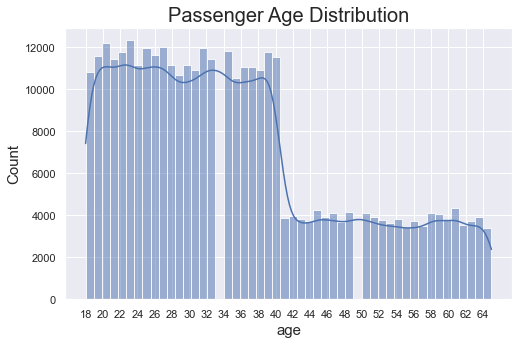

In [50]:
plt.figure(figsize = (8,5))
sns.histplot(full_df.age, kde = True, bins = 50).set_title("Passenger Age Distribution");
plt.xticks(np.arange(18,65,2));

The age distribution of the passengers in the dataset follows a two-phase uniform distribution. According to the data, the highest number of passengers are between the age groups of 18 to 40 year olds. Older passengers above 40 years old untill 65 still make up a sizable portion of passengers. 

Proportion of Male Passengers: 57.29 %
Proportion of Female Passengers: 42.71 %


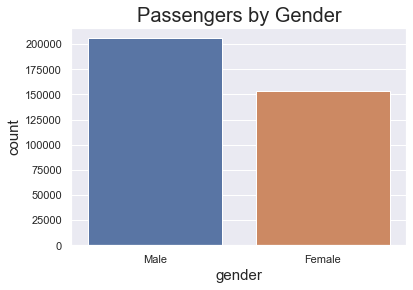

In [51]:
#Gender
print(f'Proportion of Male Passengers: {full_df.gender.value_counts(normalize = True)[0]*100:.2f} %')
print(f'Proportion of Female Passengers: {full_df.gender.value_counts(normalize = True)[1]*100:.2f} %')
sns.countplot(full_df.gender).set_title("Passengers by Gender");

Proportion of Male passengers are higher than female passengers.

# Visualizing Trips

In [52]:
#Extracting dateime info from travel_date

full_df['year'] = full_df.travel_date.dt.year
full_df['month'] = full_df.travel_date.dt.month
full_df['quarter'] = full_df.travel_date.dt.quarter
full_df['week'] = full_df.travel_date.dt.weekofyear
full_df['date'] = full_df.travel_date.dt.day
full_df['day_of_week'] = full_df.travel_date.dt.dayofweek

In [53]:
full_df

transaction_id     company        city  km_travelled  price_charged  \
0             10000013    Pink Cab     ATLANTA          9.04         125.20   
1             10000029    Pink Cab      BOSTON         21.34         324.21   
2             10000030    Pink Cab      BOSTON         41.30         646.06   
3             10000041    Pink Cab     CHICAGO         35.02         598.43   
4             10000045    Pink Cab     CHICAGO          3.24          48.04   
...                ...         ...         ...           ...            ...   
359387        10439960  Yellow Cab  WASHINGTON         33.93         474.47   
359388        10439984  Yellow Cab  WASHINGTON         40.00         641.78   
359389        10440028  Yellow Cab  WASHINGTON         26.22         405.25   
359390        10440034  Yellow Cab  WASHINGTON         34.68         505.38   
359391        10440093  Yellow Cab  WASHINGTON          4.32          60.41   

        cost_of_trip travel_date  population   users  customer_id  ...  \
0            97.6320  2016-01-02      814885   24701        28712  ...   
1           226.2040  2016-01-02      248968   80021        58925  ...   
2           454.3000  2016-01-02      248968   80021        58551  ...   
3           406.2320  2016-01-02     1955130  164468         4289  ...   
4            33.6960  2016-01-02     1955130  164468         5734  ...   
...              ...         ...         ...     ...          ...  ...   
359387      411.2316  2018-12-31      418859  127001        52449  ...   
359388      484.8000  2018-12-31      418859  127001        51614  ...   
359389      327.2256  2018-12-31      418859  127001        52389  ...   
359390      470.2608  2018-12-31      418859  127001        51877  ...   
359391       55.4688  2018-12-31      418859  127001        53810  ...   

        gender age  income_(usd/month)  state  year  month  quarter  week  \
0         Male  53               11242     GA  2016      1        1    53   
1         Male  38               26550     MA  2016      1        1    53   
2         Male  25               21734     MA  2016      1        1    53   
3         Male  19               28719     IL  2016      1        1    53   
4         Male  23               22475     IL  2016      1        1    53   
...        ...  ..                 ...    ...   ...    ...      ...   ...   
359387  Female  40               23569     DC  2018     12        4     1   
359388  Female  55               12279     DC  2018     12        4     1   
359389  Female  29                5568     DC  2018     12        4     1   
359390    Male  46               16993     DC  2018     12        4     1   
359391    Male  23               21455     DC  2018     12        4     1   

        date  day_of_week  
0          2            5  
1          2            5  
2          2            5  
3          2            5  
4          2            5  
...      ...          ...  
359387    31            0  
359388    31            0  
359389    31            0  
359390    31            0  
359391    31            0  

[359392 rows x 21 columns]

In [54]:
#Adding US Holiday information

# holiday = pd.read_csv('https://query.data.world/s/j3yvxptqfc2fpyfuzyftcw7ci7e337')
# holiday

Date                              Holiday
0   12/31/2010                       New Year's Day
1    1/17/2011  Birthday of Martin Luther King, Jr.
2    2/21/2011                Washington's Birthday
3    5/30/2011                         Memorial Day
4     7/4/2011                     Independence Day
..         ...                                  ...
95    9/7/2020                            Labor Day
96  10/12/2020                         Columbus Day
97  11/11/2020                         Veterans Day
98  11/26/2020                     Thanksgiving Day
99  12/25/2020                        Christmas Day

[100 rows x 2 columns]

In [55]:
# holiday.Date = pd.to_datetime(holiday.Date)
# holiday = holiday.query("Date.dt.year >= 2016 & Date.dt.year < 2019")
# holiday

Date                              Holiday
50 2016-01-01                       New Year's Day
51 2016-01-18  Birthday of Martin Luther King, Jr.
52 2016-02-15                Washington's Birthday
53 2016-05-30                         Memorial Day
54 2016-07-04                     Independence Day
55 2016-09-05                            Labor Day
56 2016-10-10                         Columbus Day
57 2016-11-11                         Veterans Day
58 2016-11-24                     Thanksgiving Day
59 2016-12-26                        Christmas Day
60 2017-01-02                       New Year's Day
61 2017-01-16  Birthday of Martin Luther King, Jr.
62 2017-02-20                Washington's Birthday
63 2017-05-29                         Memorial Day
64 2017-07-04                     Independence Day
65 2017-09-04                            Labor Day
66 2017-10-09                         Columbus Day
67 2017-11-10                         Veterans Day
68 2017-11-23                     Thanksgiving Day
69 2017-12-25                        Christmas Day
70 2018-01-01                       New Year's Day
71 2018-01-15  Birthday of Martin Luther King, Jr.
72 2018-02-19                Washington's Birthday
73 2018-05-28                         Memorial Day
74 2018-07-04                     Independence Day
75 2018-09-03                            Labor Day
76 2018-10-08                         Columbus Day
77 2018-11-12                         Veterans Day
78 2018-11-22                     Thanksgiving Day
79 2018-12-25                        Christmas Day

In [56]:
# holiday['is_holiday'] = 1
# holiday

Date                              Holiday  is_holiday
50 2016-01-01                       New Year's Day           1
51 2016-01-18  Birthday of Martin Luther King, Jr.           1
52 2016-02-15                Washington's Birthday           1
53 2016-05-30                         Memorial Day           1
54 2016-07-04                     Independence Day           1
55 2016-09-05                            Labor Day           1
56 2016-10-10                         Columbus Day           1
57 2016-11-11                         Veterans Day           1
58 2016-11-24                     Thanksgiving Day           1
59 2016-12-26                        Christmas Day           1
60 2017-01-02                       New Year's Day           1
61 2017-01-16  Birthday of Martin Luther King, Jr.           1
62 2017-02-20                Washington's Birthday           1
63 2017-05-29                         Memorial Day           1
64 2017-07-04                     Independence Day           1
65 2017-09-04                            Labor Day           1
66 2017-10-09                         Columbus Day           1
67 2017-11-10                         Veterans Day           1
68 2017-11-23                     Thanksgiving Day           1
69 2017-12-25                        Christmas Day           1
70 2018-01-01                       New Year's Day           1
71 2018-01-15  Birthday of Martin Luther King, Jr.           1
72 2018-02-19                Washington's Birthday           1
73 2018-05-28                         Memorial Day           1
74 2018-07-04                     Independence Day           1
75 2018-09-03                            Labor Day           1
76 2018-10-08                         Columbus Day           1
77 2018-11-12                         Veterans Day           1
78 2018-11-22                     Thanksgiving Day           1
79 2018-12-25                        Christmas Day           1

In [57]:
# new_df = full_df.merge(holiday, left_on = 'travel_date', right_on = 'Date', how = 'left')
# new_df.drop(['Date', 'Holiday'], axis = 1, inplace = True)

In [58]:
# new_df

In [59]:
# new_df.fillna(0, inplace = True)

In [60]:
# new_df.query("is_holiday == 1")

In [61]:
trip = full_df.groupby(['travel_date', 'company']).count()['city'].to_frame().reset_index()
#when groupingby and aggregating using count function, all the columns display the same values. Hence,
#I randomly selected cities as it was a shorter column name.

#Changing column names
trip.columns = ['travel_date', 'company', 'no_of_trips']

#full_df.travel_date = full_df.travel_date.dt.date
trip

travel_date     company  no_of_trips
0     2016-01-02    Pink Cab           41
1     2016-01-02  Yellow Cab          140
2     2016-01-03    Pink Cab           52
3     2016-01-03  Yellow Cab          126
4     2016-01-04    Pink Cab            4
...          ...         ...          ...
2185  2018-12-29  Yellow Cab          630
2186  2018-12-30    Pink Cab           56
2187  2018-12-30  Yellow Cab          201
2188  2018-12-31    Pink Cab           58
2189  2018-12-31  Yellow Cab          198

[2190 rows x 3 columns]

In [62]:
trip["day"] = trip.travel_date.dt.day_name()
trip

travel_date     company  no_of_trips       day
0     2016-01-02    Pink Cab           41  Saturday
1     2016-01-02  Yellow Cab          140  Saturday
2     2016-01-03    Pink Cab           52    Sunday
3     2016-01-03  Yellow Cab          126    Sunday
4     2016-01-04    Pink Cab            4    Monday
...          ...         ...          ...       ...
2185  2018-12-29  Yellow Cab          630  Saturday
2186  2018-12-30    Pink Cab           56    Sunday
2187  2018-12-30  Yellow Cab          201    Sunday
2188  2018-12-31    Pink Cab           58    Monday
2189  2018-12-31  Yellow Cab          198    Monday

[2190 rows x 4 columns]

In [63]:
# daily_trip = trip.merge(holiday, how = 'left', left_on = 'travel_date', right_on = 'Date')
# daily_trip.drop(['Date', 'Holiday'], axis = 1, inplace = True)
# daily_trip.fillna(0, inplace = True)
# daily_trip

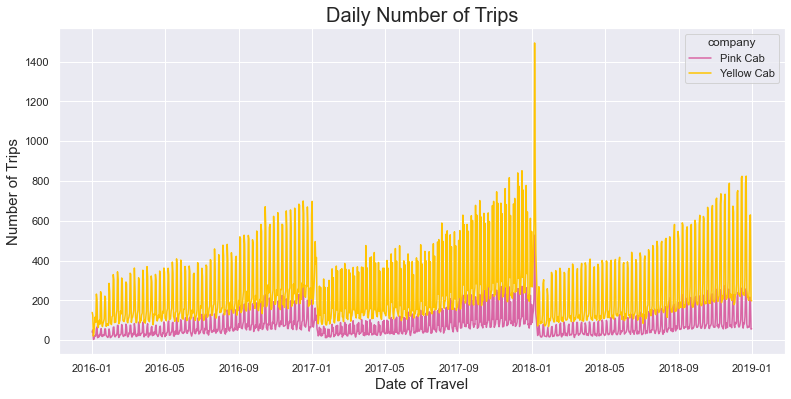

In [64]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'no_of_trips', data = trip, hue = 'company', 
             palette=['#d965a4', '#ffc400']);
plt.title('Daily Number of Trips');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');

The above plots displays daily trips made by both Cab companies from beginning of 2016 till the end of  2018. There is a clear seasonality on a weekly, monthly and yearly level for both Cab companies. Both Cab companies follows the same patterns. <br>
<br>
On a monthly level, there is a clear upward trend. On new year, the number of trips made dips down to the lowest agan. But on a yearly level, the trend seems to be almost uniform.<br>
<br>
**$\color{yellow}{\text{Yellow Cab}}$** makes a significantly more trips on any given day compared to **$\color{violet}{\text{Pink Cab}}$**. The highest reported trips for both Cab companies was on 5th of Januray, 2018. We will look at the reason why was there a hike on number of trips on that particular day in the coming sections.

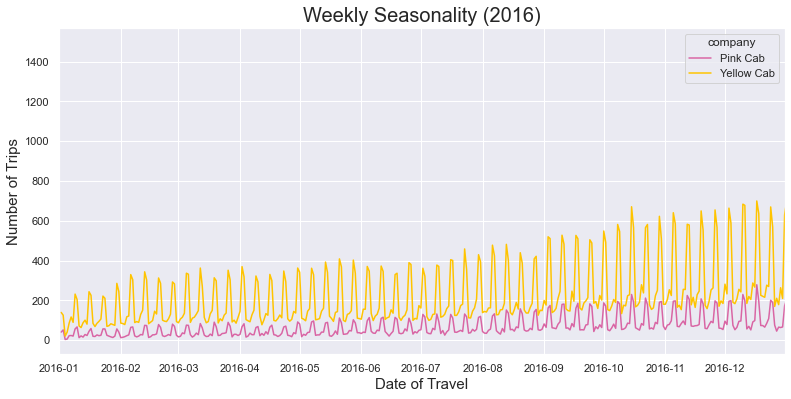

In [65]:
#Selecting a random month and year to check for daily seasonality in any given month

plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'no_of_trips', data = trip, hue = 'company', 
             palette=['#d965a4', '#ffc400']);

# for x in daily_trip.query("is_holiday == 1")['travel_date']: 
#     plt.axvline(x=x, color='k', alpha = 0.3, linestyle='--');

# for x in trip.query("day == 'Sunday' or day == 'Saturday'")['travel_date']: 
#     plt.axvline(x=x, color='k', alpha = 0.3, linestyle='--');

plt.title('Weekly Seasonality (2016)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2016-01-01", "2016-12-31");

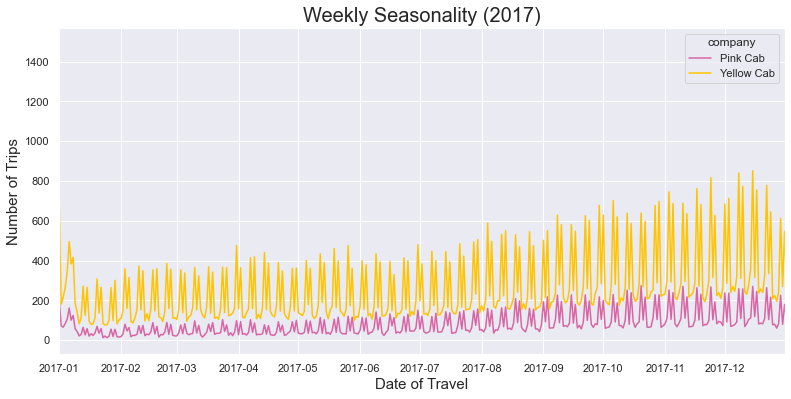

In [66]:
#Selecting a random month and year to check for daily seasonality in any given month

plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'no_of_trips', data = trip, hue = 'company', 
             palette=['#d965a4', '#ffc400']);

# for x in trip.query("day == 'Sunday' or day == 'Saturday'")['travel_date']: 
#     plt.axvline(x=x, color='k', alpha = 0.3, linestyle='--');

plt.title('Weekly Seasonality (2017)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2017-01-01", "2017-12-31");

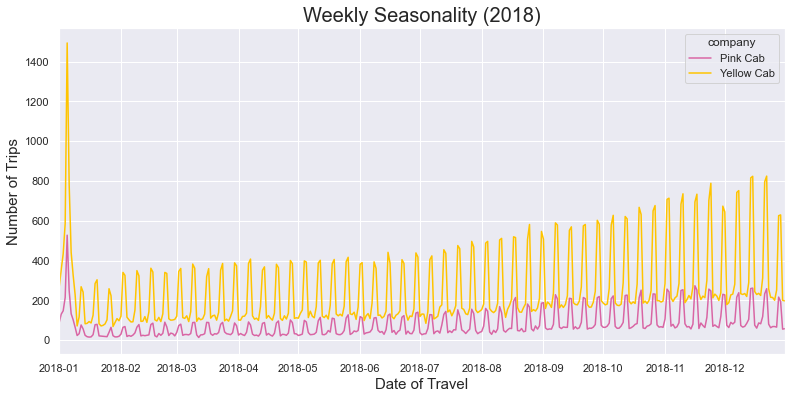

In [67]:
#Selecting a random month and year to check for daily seasonality in any given month

plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'no_of_trips', data = trip, hue = 'company', 
             palette=['#d965a4', '#ffc400']);

# for x in trip.query("day == 'Sunday' or day == 'Saturday'")['travel_date']: 
#     plt.axvline(x=x, color='k', alpha = 0.3, linestyle='--');

plt.title('Weekly Seasonality (2018)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2018-01-01", "2018-12-31");

For the year 2017, the seasonality pattern is different compared to both 2016 and 2018.

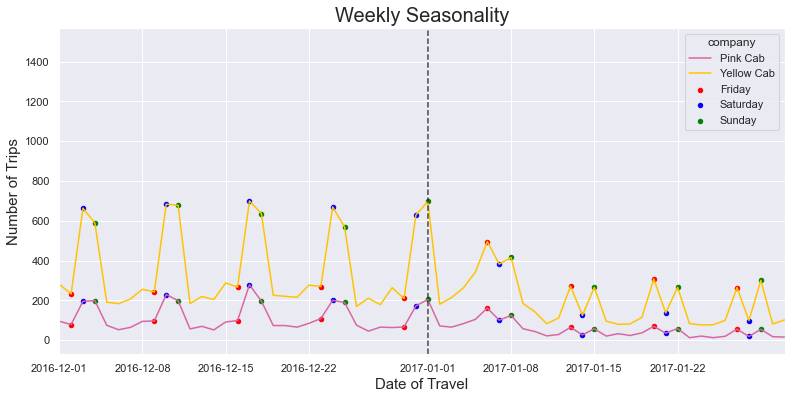

In [68]:
#Selecting range of months
#2016 to 2017

plt.figure(figsize = (13,6))

ax = sns.lineplot(x = 'travel_date', y = 'no_of_trips', data = trip, hue = 'company', 
             palette=['#d965a4', '#ffc400']);


# for x in trip.query("day in ('Friday', 'Saturday', 'Sunday')")['travel_date']: 
#     plt.axvline(x=x, color='k', alpha = 0.3, linestyle='--');

plt.axvline(x = '2017-01-01', color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green']):
    trip.query(f"day == '{day}'")[['travel_date', 'no_of_trips']].\
    plot.scatter(x = 'travel_date', y = 'no_of_trips', ax = ax, label = f'{day}', color = color);


plt.title('Weekly Seasonality');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2016-12-01", "2017-01-31");

On any given month, there is a weekly seasonality where the number of trips are especially high during the weekends (Saturday and Sunday) for the year 2016.<br>
<br>
Interestingly, for the year 2017, the seasonality starts to change. There is an increase in number of rides during fridays, then it dips down on saturdays and then increases again during sunday. This pattern is observed for both Cab companies. <br>

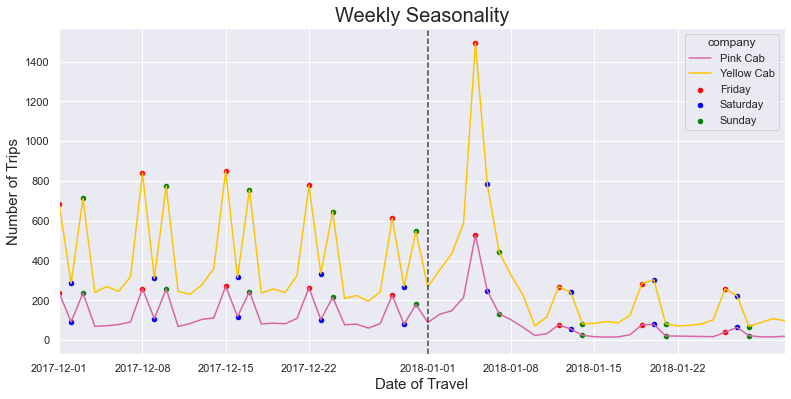

In [69]:
#2017 to 2018

plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'travel_date', y = 'no_of_trips', data = trip, hue = 'company', 
             palette=['#d965a4', '#ffc400']);

# for x in trip.query("day in ('Friday', 'Saturday', 'Sunday')")['travel_date']: 
#     plt.axvline(x=x, color='k', alpha = 0.3, linestyle='--');

plt.axvline(x = '2018-01-01', color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green']):
    trip.query(f"day == '{day}'")[['travel_date', 'no_of_trips']].\
    plot.scatter(x = 'travel_date', y = 'no_of_trips', ax = ax, label = f'{day}', color = color);

plt.title('Weekly Seasonality');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2017-12-01", "2018-01-31");

From 2017 to 2018, the pattern changes once again, this time, there is a peak of riders during friday, then saturday but then dips to down to low during sunday. <br>
<br>
Next, lets aggregate at a monthly level.

In [70]:
#Aggregating at a month level to visualize month seasonality

month_trip = full_df.groupby(['year', 'month', 'company']).count()['city'].reset_index()
month_trip

year  month     company   city
0   2016      1    Pink Cab    927
1   2016      1  Yellow Cab   3719
2   2016      2    Pink Cab   1050
3   2016      2  Yellow Cab   4674
4   2016      3    Pink Cab   1231
..   ...    ...         ...    ...
67  2018     10  Yellow Cab   9727
68  2018     11    Pink Cab   3897
69  2018     11  Yellow Cab  11230
70  2018     12    Pink Cab   3800
71  2018     12  Yellow Cab  11766

[72 rows x 4 columns]

In [71]:
month_trip['month_level'] = month_trip['year'].astype('str') + "-" + month_trip['month'].astype('str')
month_trip

year  month     company   city month_level
0   2016      1    Pink Cab    927      2016-1
1   2016      1  Yellow Cab   3719      2016-1
2   2016      2    Pink Cab   1050      2016-2
3   2016      2  Yellow Cab   4674      2016-2
4   2016      3    Pink Cab   1231      2016-3
..   ...    ...         ...    ...         ...
67  2018     10  Yellow Cab   9727     2018-10
68  2018     11    Pink Cab   3897     2018-11
69  2018     11  Yellow Cab  11230     2018-11
70  2018     12    Pink Cab   3800     2018-12
71  2018     12  Yellow Cab  11766     2018-12

[72 rows x 5 columns]

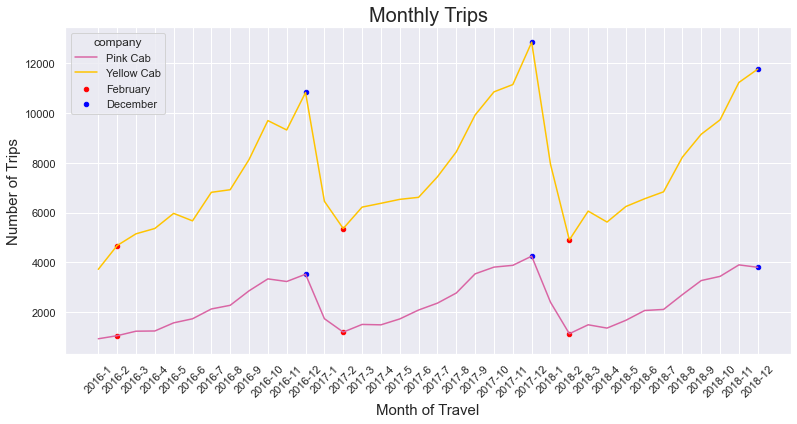

In [72]:
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'month_level', y = 'city', data = month_trip, hue = 'company', 
             palette=['#d965a4', '#ffc400']);

for month, name, color in zip([2,12], ['February', 'December'], ['red', 'blue']):
    month_trip.query(f"month == '{month}'")[['month_level', 'city']].\
    plot.scatter(x = 'month_level', y = 'city', ax = ax, label = f'{name}', color = color);

plt.xticks(rotation = 45)
plt.title('Monthly Trips');
plt.xlabel('Month of Travel');
plt.ylabel('Number of Trips');

When aggregating trips at a monthly level, again, there is a clear seasonality. The number of trips at the month of February is the lowest and the number of trips at the month of December is the higest for all the years. For both Cab companies, there is a slight upward trend  throughout the years.

##### Next, I will visualize daily trips per city for both Cab companies

In [73]:
#Daily Trip per City

city_trips_daily = full_df.groupby(['travel_date', 'city', 'company']).count()['users'].\
                                                                to_frame().reset_index()
city_trips_daily

travel_date            city     company  users
0      2016-01-02         ATLANTA    Pink Cab      1
1      2016-01-02         ATLANTA  Yellow Cab      4
2      2016-01-02          BOSTON    Pink Cab      2
3      2016-01-02          BOSTON  Yellow Cab      8
4      2016-01-02         CHICAGO    Pink Cab      7
...           ...             ...         ...    ...
32840  2018-12-31  SILICON VALLEY  Yellow Cab      4
32841  2018-12-31          TUCSON    Pink Cab      1
32842  2018-12-31          TUCSON  Yellow Cab      2
32843  2018-12-31      WASHINGTON    Pink Cab      1
32844  2018-12-31      WASHINGTON  Yellow Cab     29

[32845 rows x 4 columns]

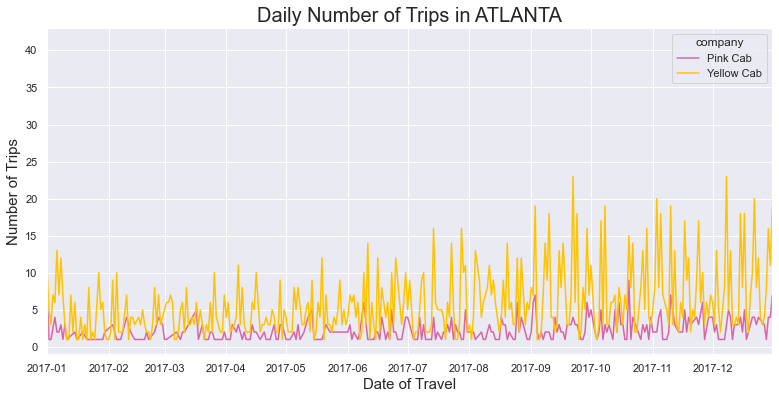

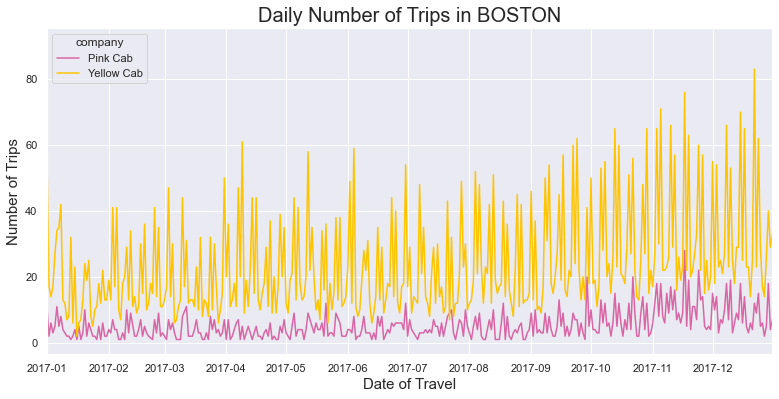

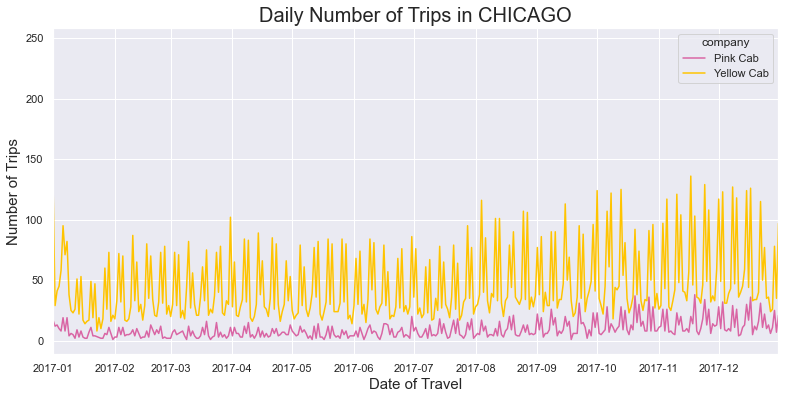

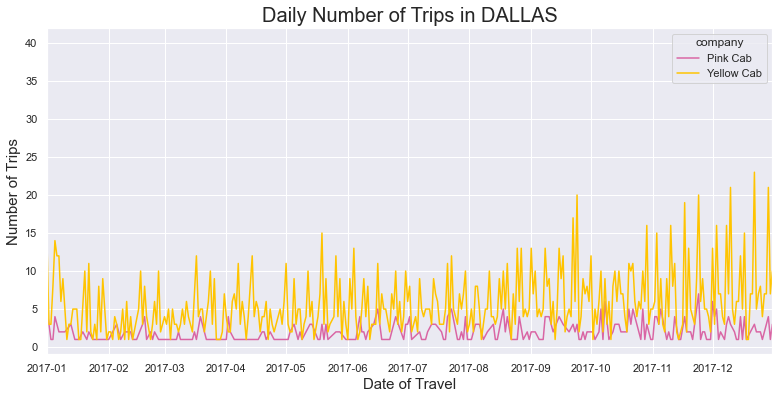

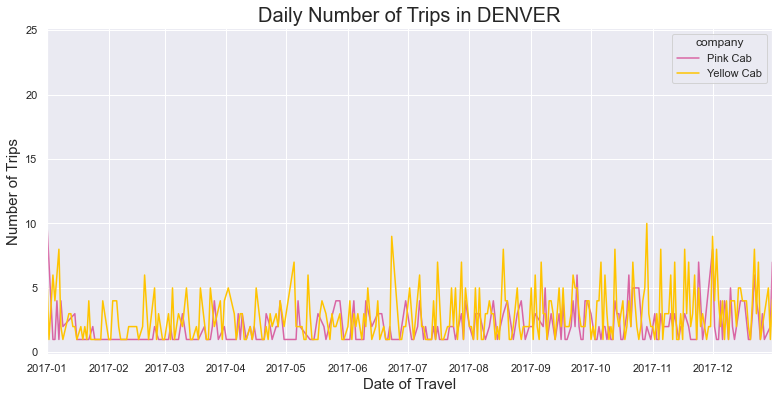

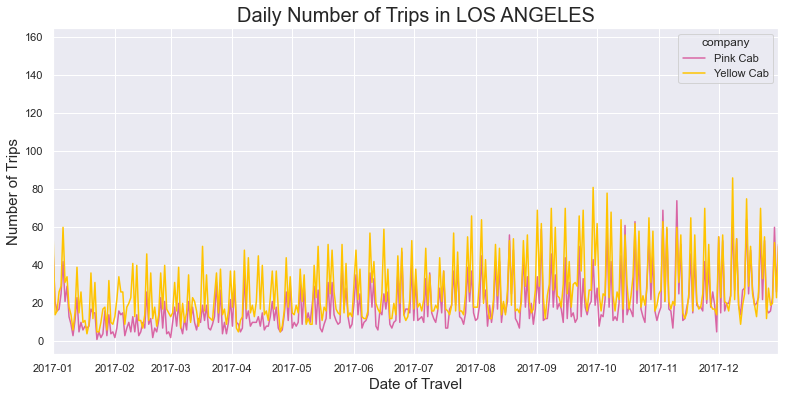

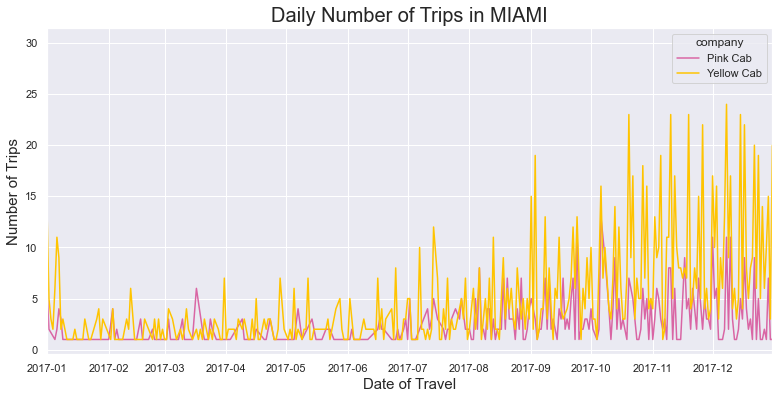

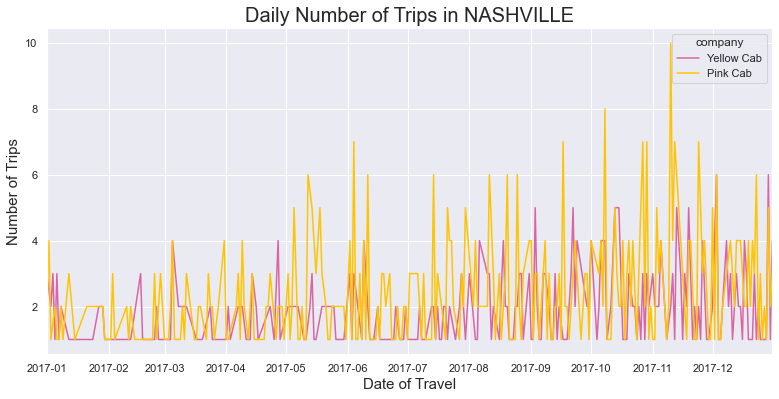

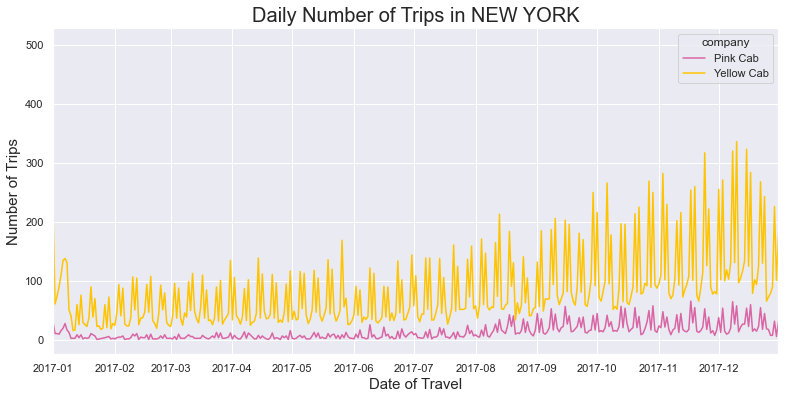

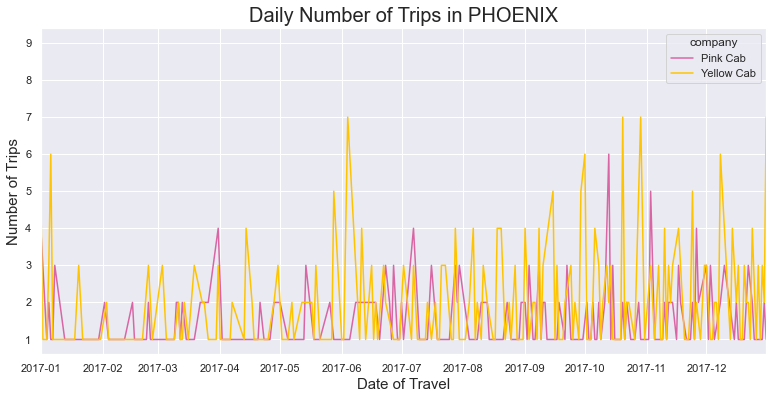

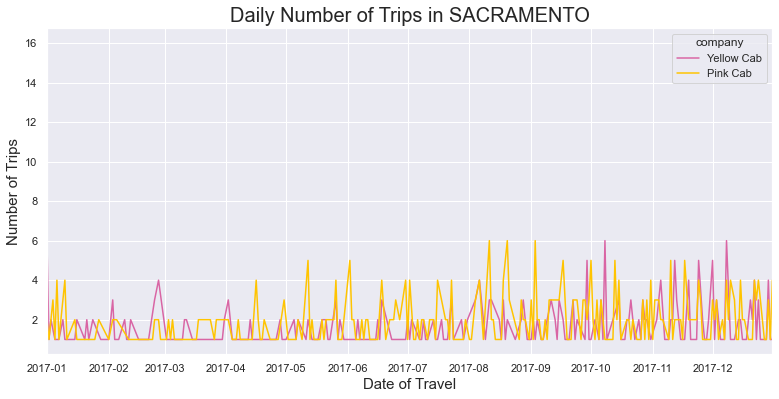

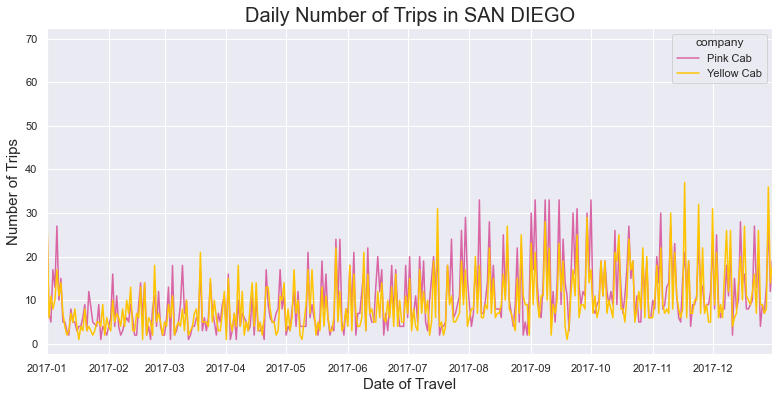

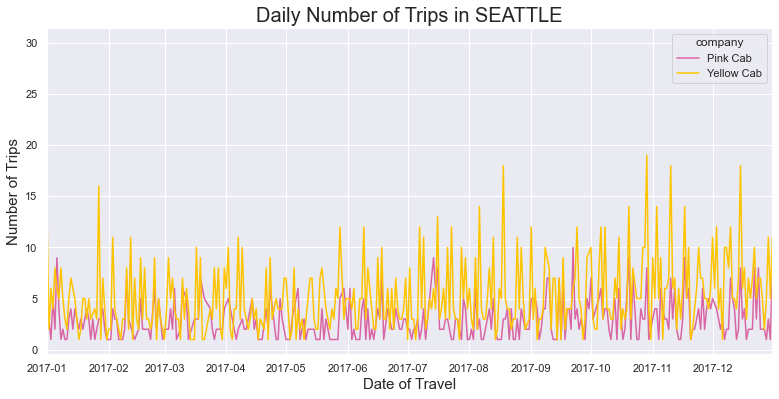

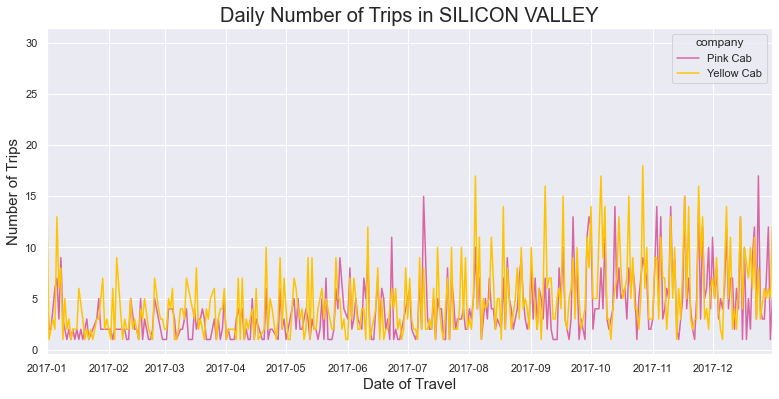

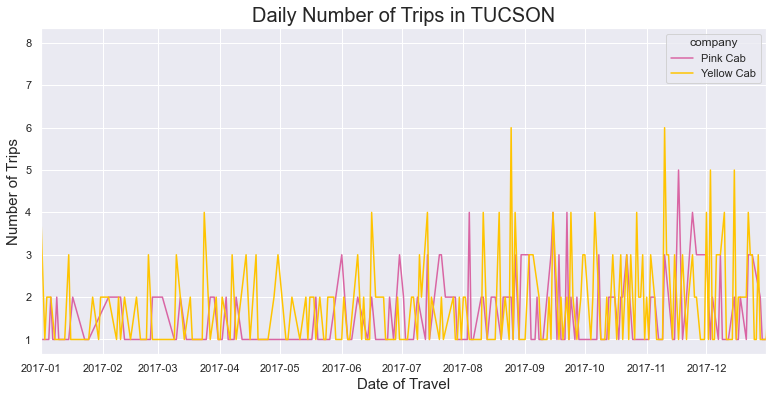

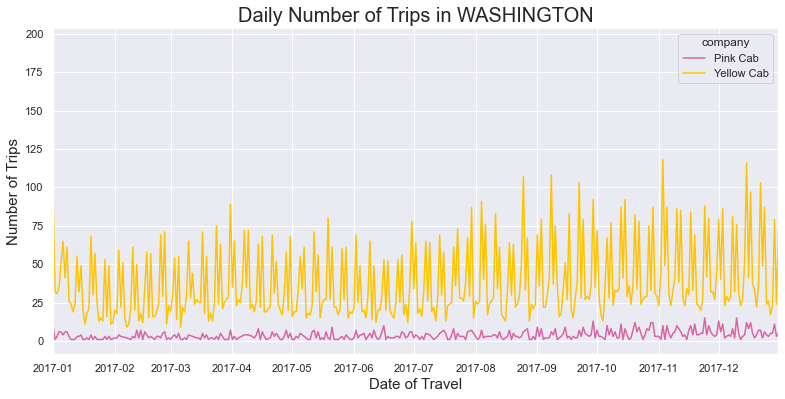

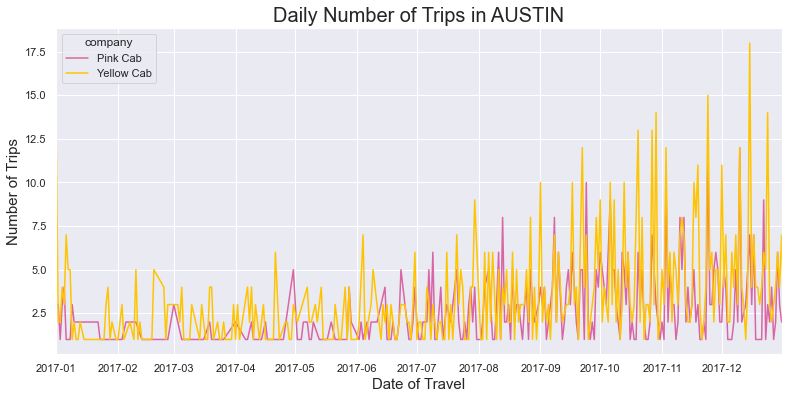

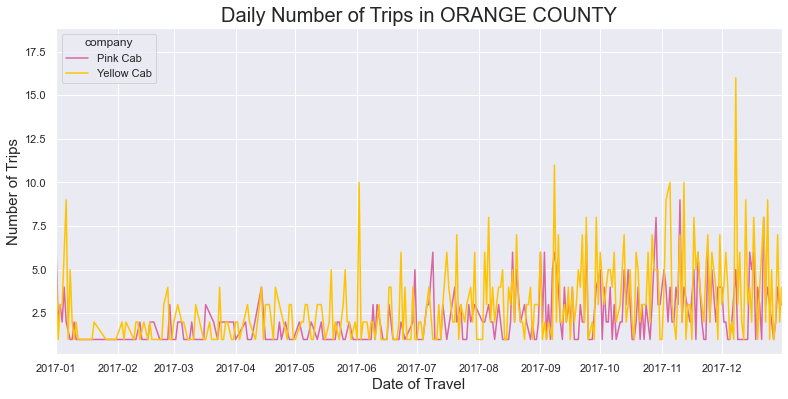

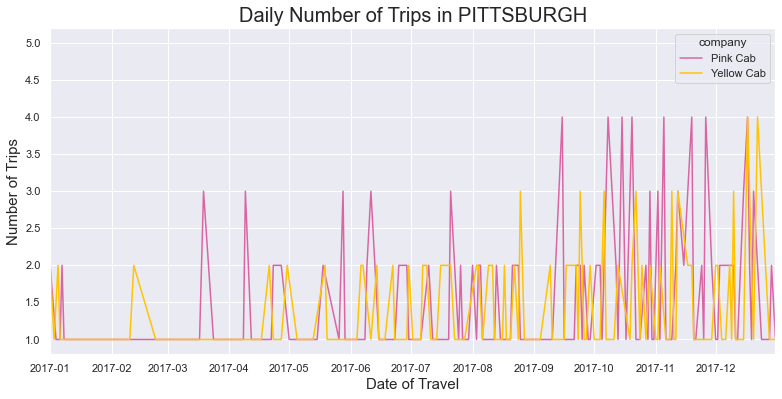

In [74]:
for i in city_trips_daily.city.unique():
    plt.figure(figsize = (13,6))
    temp_df = city_trips_daily.query(f"city == '{i}'")
    
    sns.lineplot(x = 'travel_date', y = 'users', data = temp_df, hue = 'company', 
                 palette=['#d965a4', '#ffc400']);

    plt.title(f'Daily Number of Trips in {i}');
    plt.xlabel('Date of Travel');
    plt.ylabel('Number of Trips');
    plt.xlim("2017-01-01", "2017-12-31");

Interestingly, the pattern observed previously differs when visualizing number of trips at city level. For many cities, both cab companies seems to have almost the same number of rides at a given day. But, at a daily level, its too hard to clearly see any distinction between the 2 Cab companies except for a few cities. <br>
<br>
Perhaps visualizing at a month level for each cities might show a clearer pattern.

In [75]:
city_trips_month = full_df.groupby(['year', 'month', 'city', 'company']).count()['users'].\
                            to_frame().reset_index()

city_trips_month['month_level'] = city_trips_month['year'].astype('str') + "_" + \
                                                city_trips_month['month'].astype('str')

city_trips_month

year  month            city     company  users month_level
0     2016      1         ATLANTA    Pink Cab     21      2016_1
1     2016      1         ATLANTA  Yellow Cab     85      2016_1
2     2016      1          AUSTIN    Pink Cab      7      2016_1
3     2016      1          AUSTIN  Yellow Cab     24      2016_1
4     2016      1          BOSTON    Pink Cab     72      2016_1
...    ...    ...             ...         ...    ...         ...
1363  2018     12  SILICON VALLEY  Yellow Cab    205     2018_12
1364  2018     12          TUCSON    Pink Cab     29     2018_12
1365  2018     12          TUCSON  Yellow Cab     50     2018_12
1366  2018     12      WASHINGTON    Pink Cab    188     2018_12
1367  2018     12      WASHINGTON  Yellow Cab   1500     2018_12

[1368 rows x 6 columns]

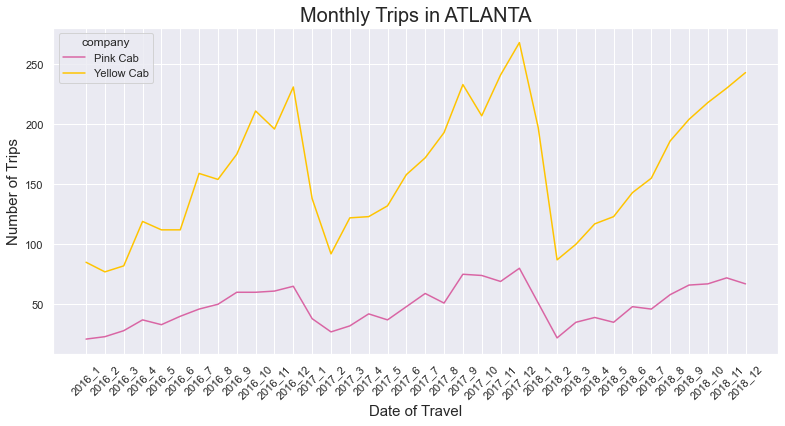

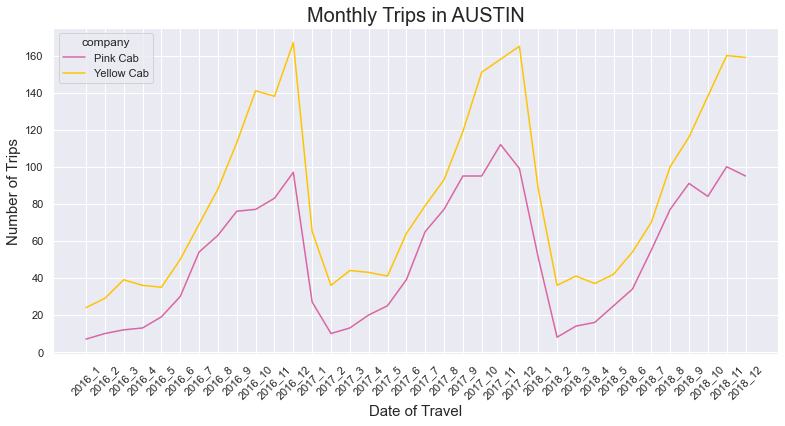

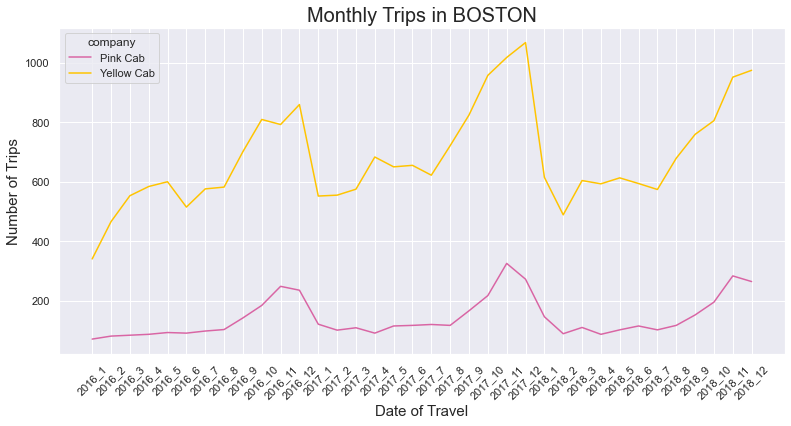

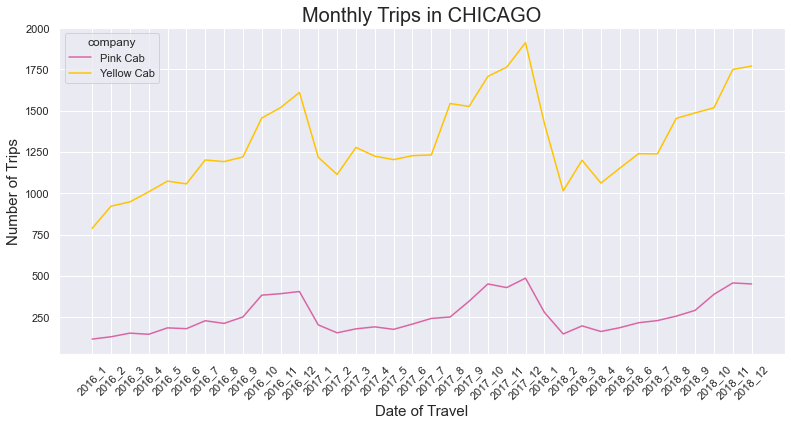

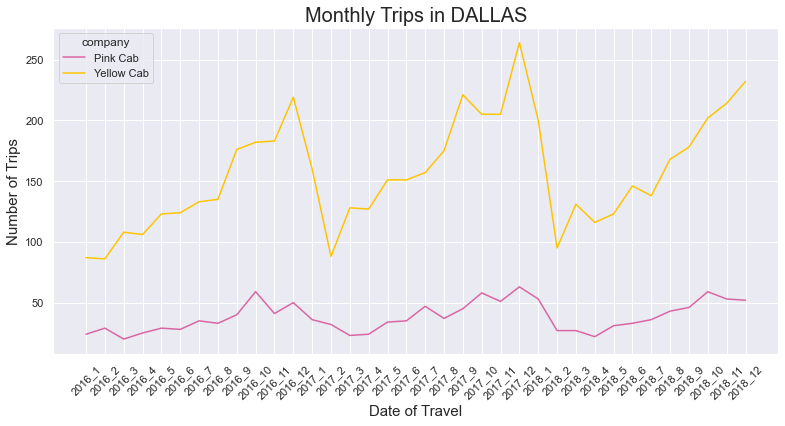

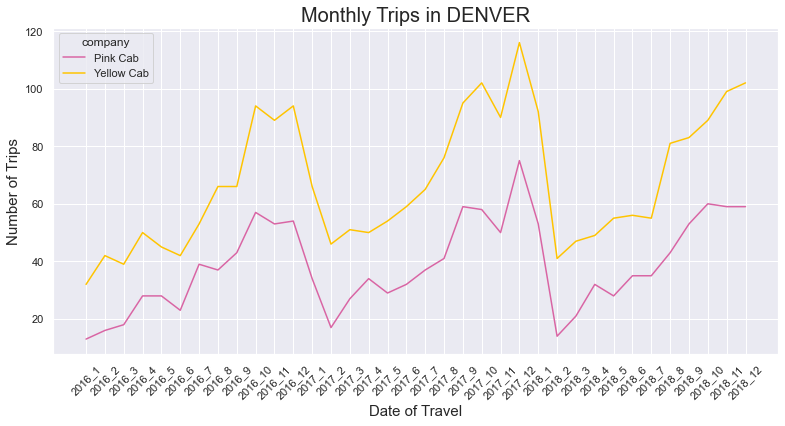

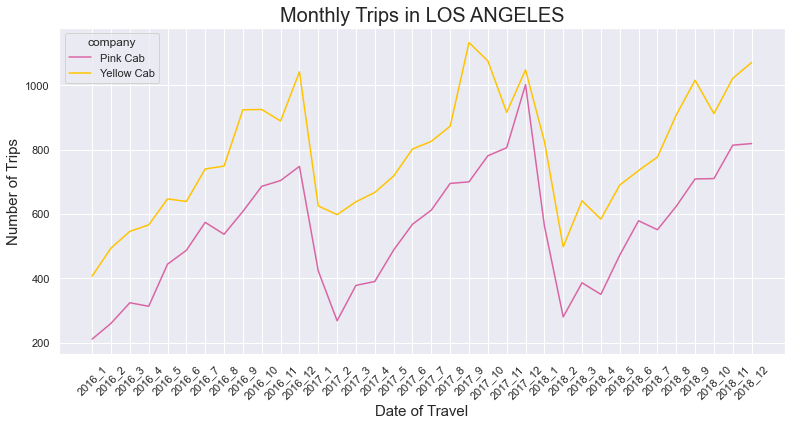

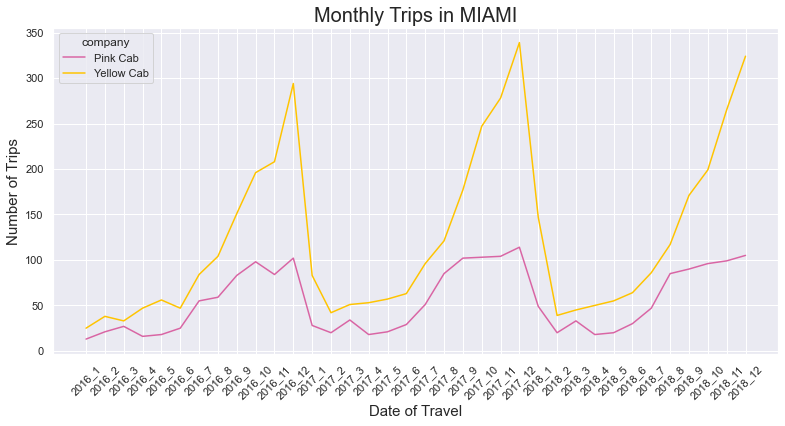

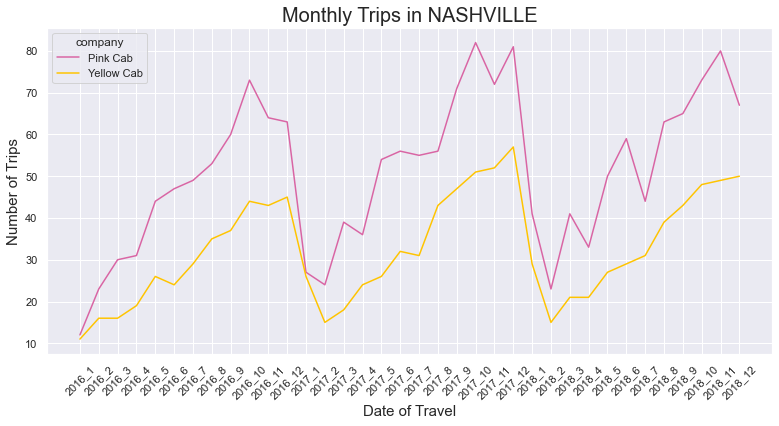

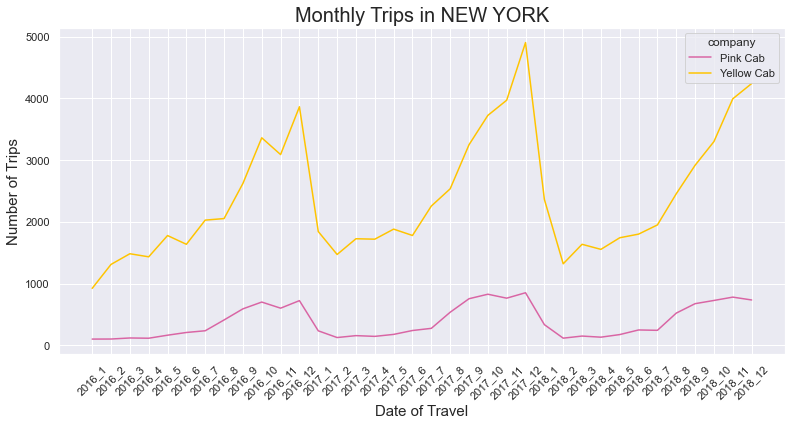

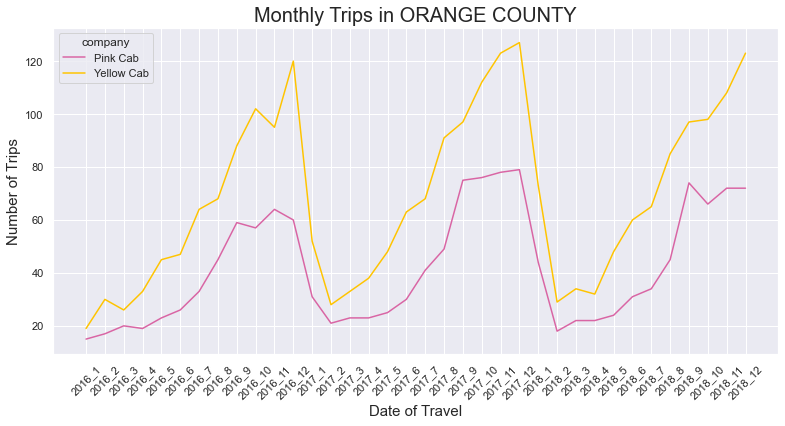

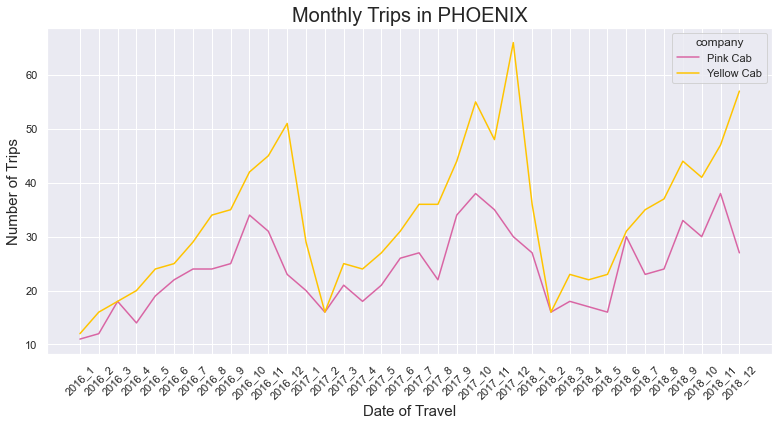

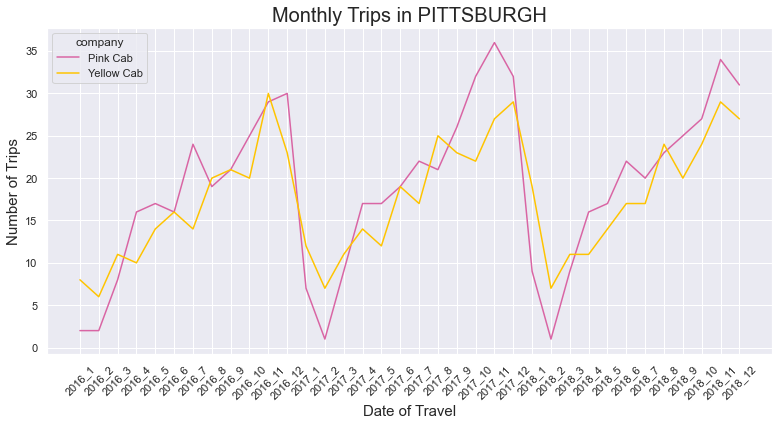

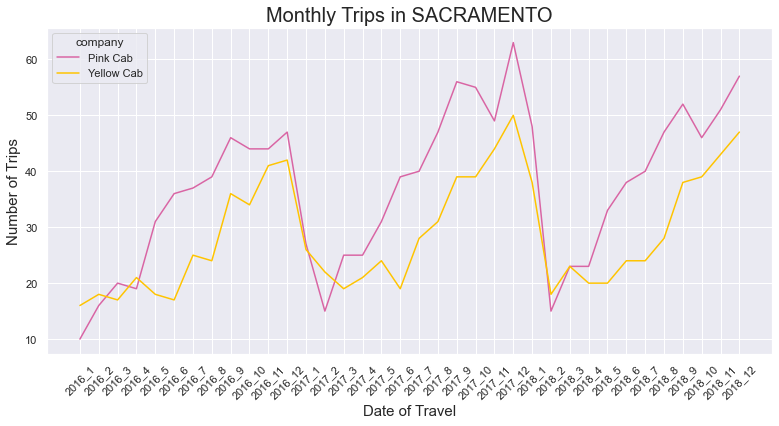

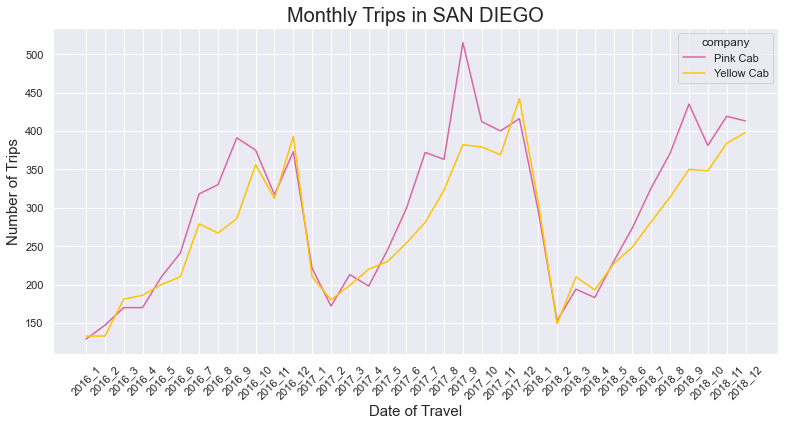

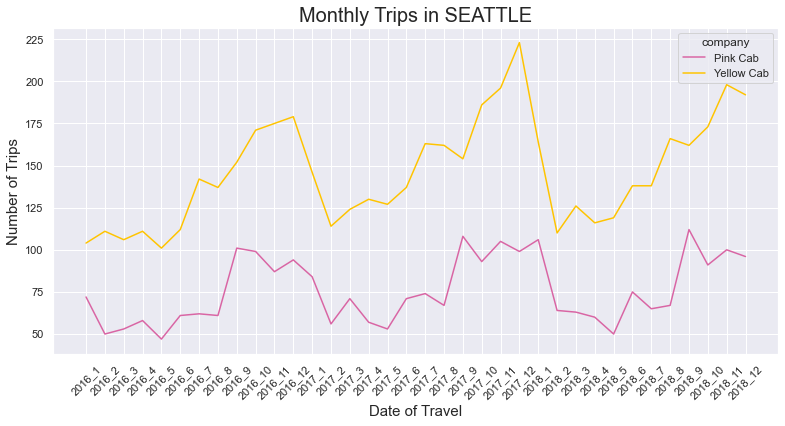

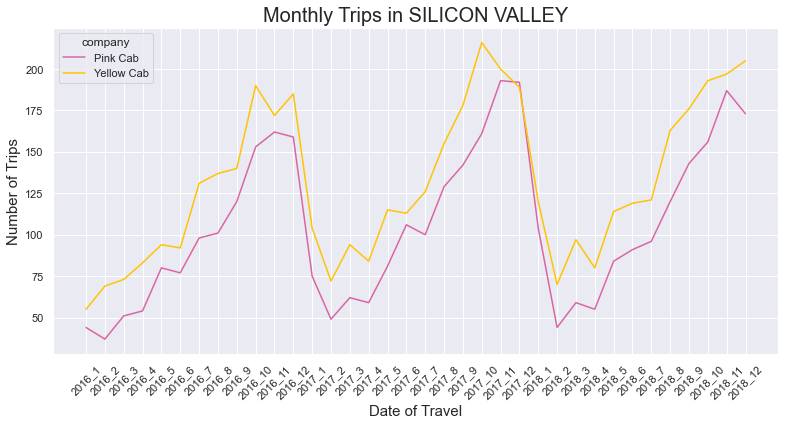

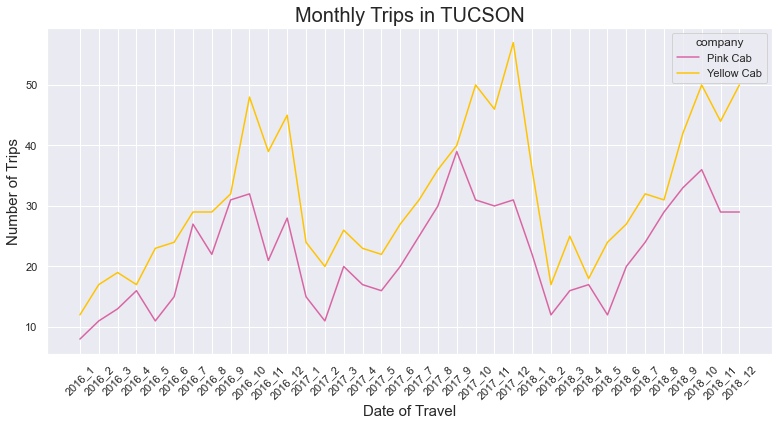

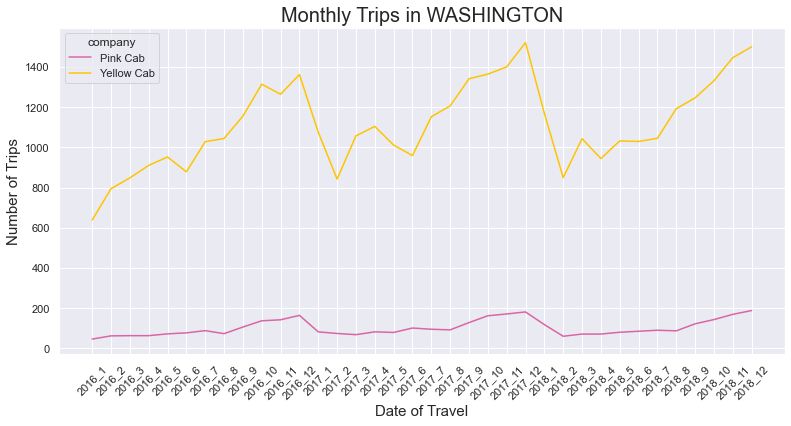

In [76]:
for i in city_trips_month.city.unique():
    plt.figure(figsize = (13,6))
    temp_df = city_trips_month.query(f"city == '{i}'")
    
    sns.lineplot(x = 'month_level', y = 'users', data = temp_df, hue = 'company', 
                 palette=['#d965a4', '#ffc400']);

    plt.title(f'Monthly Trips in {i}');
    plt.xlabel('Date of Travel');
    plt.ylabel('Number of Trips');
    plt.xticks(rotation = 45)

The above plots displays patterns at city level more clearly.
<br>
<br>
* **$\color{yellow}{\text{Yellow Cab}}$** thrives on the following cities: **Atlanta, Austin, Boston, Chicago, Dallas, Denver, Los Angeles, Miami, New York, Orange County, Pheonix, Seattle, Silicon Valley, Tucson, Washington**.
<br>
<br>
* **$\color{violet}{\text{Pink Cab}}$** thrives on the following cities: **Nashville and Sacremento**. 
<br>

In cities such as **Pittsburgh and Sandiego** both companies have almost the same number of rides.
<br>
<br>
Overall, **$\color{yellow}{\text{Yellow Cab}}$** company seems to perform well in terms of the number of rides during the time period.

# Visualizing Trip information

* Whats the income made by the driver for each trip?

**Assumptions**

1) Due to limited avaiable data on the internet, I will assume that the expenses for the trip only involves fuel charges. 

2) There aren't sufficient data on the internet for the base fares per year for each city in the US. This will be left out of the analysis.

In [77]:
full_df['op_income'] = full_df.price_charged - full_df.cost_of_trip #operating income
full_df

transaction_id     company        city  km_travelled  price_charged  \
0             10000013    Pink Cab     ATLANTA          9.04         125.20   
1             10000029    Pink Cab      BOSTON         21.34         324.21   
2             10000030    Pink Cab      BOSTON         41.30         646.06   
3             10000041    Pink Cab     CHICAGO         35.02         598.43   
4             10000045    Pink Cab     CHICAGO          3.24          48.04   
...                ...         ...         ...           ...            ...   
359387        10439960  Yellow Cab  WASHINGTON         33.93         474.47   
359388        10439984  Yellow Cab  WASHINGTON         40.00         641.78   
359389        10440028  Yellow Cab  WASHINGTON         26.22         405.25   
359390        10440034  Yellow Cab  WASHINGTON         34.68         505.38   
359391        10440093  Yellow Cab  WASHINGTON          4.32          60.41   

        cost_of_trip travel_date  population   users  customer_id  ... age  \
0            97.6320  2016-01-02      814885   24701        28712  ...  53   
1           226.2040  2016-01-02      248968   80021        58925  ...  38   
2           454.3000  2016-01-02      248968   80021        58551  ...  25   
3           406.2320  2016-01-02     1955130  164468         4289  ...  19   
4            33.6960  2016-01-02     1955130  164468         5734  ...  23   
...              ...         ...         ...     ...          ...  ...  ..   
359387      411.2316  2018-12-31      418859  127001        52449  ...  40   
359388      484.8000  2018-12-31      418859  127001        51614  ...  55   
359389      327.2256  2018-12-31      418859  127001        52389  ...  29   
359390      470.2608  2018-12-31      418859  127001        51877  ...  46   
359391       55.4688  2018-12-31      418859  127001        53810  ...  23   

       income_(usd/month)  state  year month  quarter  week  date  \
0                   11242     GA  2016     1        1    53     2   
1                   26550     MA  2016     1        1    53     2   
2                   21734     MA  2016     1        1    53     2   
3                   28719     IL  2016     1        1    53     2   
4                   22475     IL  2016     1        1    53     2   
...                   ...    ...   ...   ...      ...   ...   ...   
359387              23569     DC  2018    12        4     1    31   
359388              12279     DC  2018    12        4     1    31   
359389               5568     DC  2018    12        4     1    31   
359390              16993     DC  2018    12        4     1    31   
359391              21455     DC  2018    12        4     1    31   

        day_of_week  op_income  
0                 5    27.5680  
1                 5    98.0060  
2                 5   191.7600  
3                 5   192.1980  
4                 5    14.3440  
...             ...        ...  
359387            0    63.2384  
359388            0   156.9800  
359389            0    78.0244  
359390            0    35.1192  
359391            0     4.9412  

[359392 rows x 22 columns]

In [78]:
full_df[['km_travelled', 'price_charged', 'cost_of_trip', 'op_income']].describe().T

count        mean         std     min       25%      50%  \
km_travelled   359392.0   22.567254   12.233526    1.90   12.0000   22.440   
price_charged  359392.0  423.443311  274.378911   15.60  206.4375  386.360   
cost_of_trip   359392.0  286.190113  157.993661   19.00  151.2000  282.480   
op_income      359392.0  137.253198  160.311840 -220.06   28.0120   81.962   

                    75%       max  
km_travelled    32.9600    48.000  
price_charged  583.6600  2048.030  
cost_of_trip   413.6832   691.200  
op_income      190.0300  1463.966

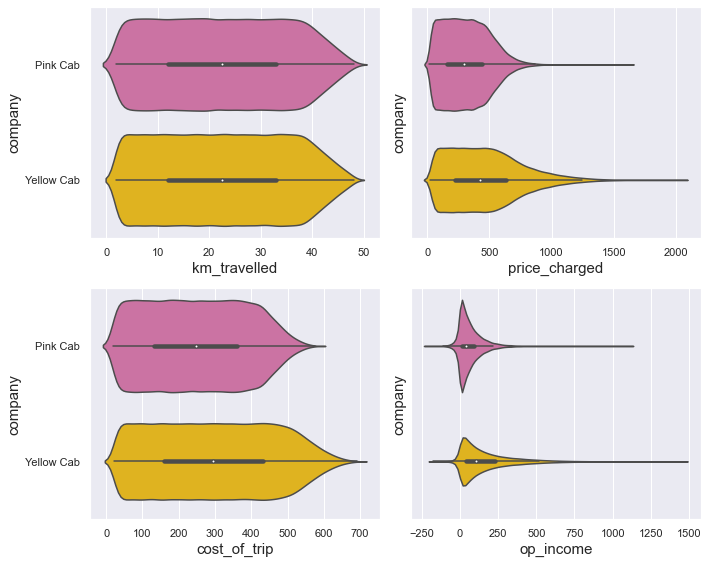

In [79]:
fig, axes = plt.subplots(2,2, figsize = (10,8), sharey = True)

for col, ax in zip(['km_travelled', 'price_charged', 'cost_of_trip', 'op_income'], 
                   axes.flatten()):
    
    sns.violinplot(x = col, data = full_df, y = 'company', ax = ax, palette=['#d965a4', '#ffc400']);
    plt.tight_layout();

Above plots illustrates distribution of features related to the trip. The distributions of the distance travelled, Cab fares and Cab expenses all follow a uniform distribution. Only operational income follows a gaussian distribution that is skewed to the right. <br>
<br>
Next, I will visualize the data in a way that might reveal any correlation between these features. I will only take a sample of the data as it is computationally expensive to plot a pairplot on the whole dataset.

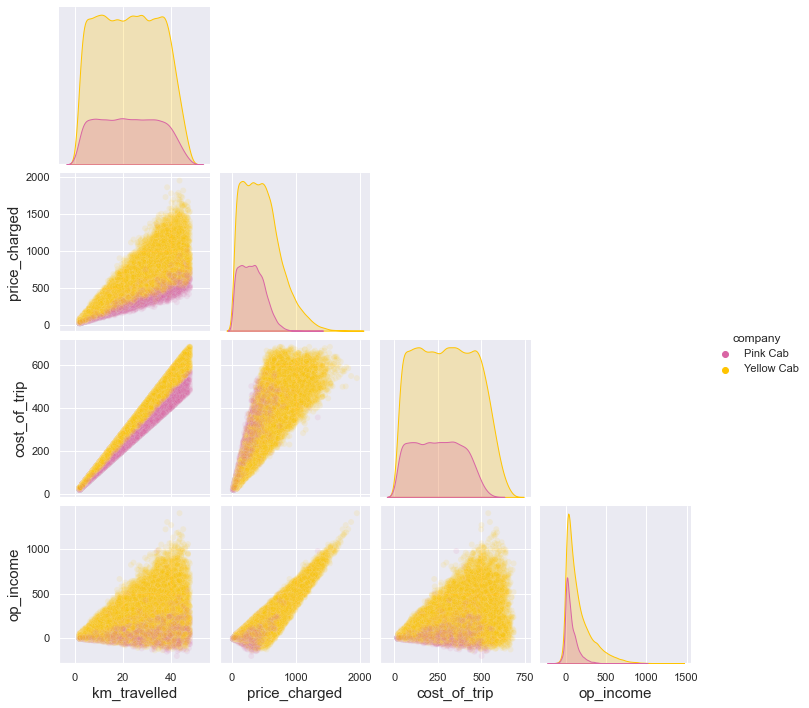

In [80]:
sampled_df = full_df[['km_travelled', 'price_charged', 'cost_of_trip', 'op_income', 
                      'company']].sample(frac = 0.15, random_state=42)

sns.pairplot(sampled_df, hue = 'company', hue_order = ['Pink Cab', 'Yellow Cab'], 
             palette=['#d965a4', '#ffc400'], corner=True, plot_kws={'alpha': 0.1});

As is obvious, all features have correlation with each other. In general, as the distance of travel increases, both Can expenses and Cab fare increases. The correlation is strong between distance travelled and Cab expenses. <br>
<br>
For the operational expenses, there is a greater spread between all of the variables. When looking closely at the scatter plot between proce charged and operational income, the spread is higher when the proce charged is low but the spread becomes less as the proce charged increases.

# Income

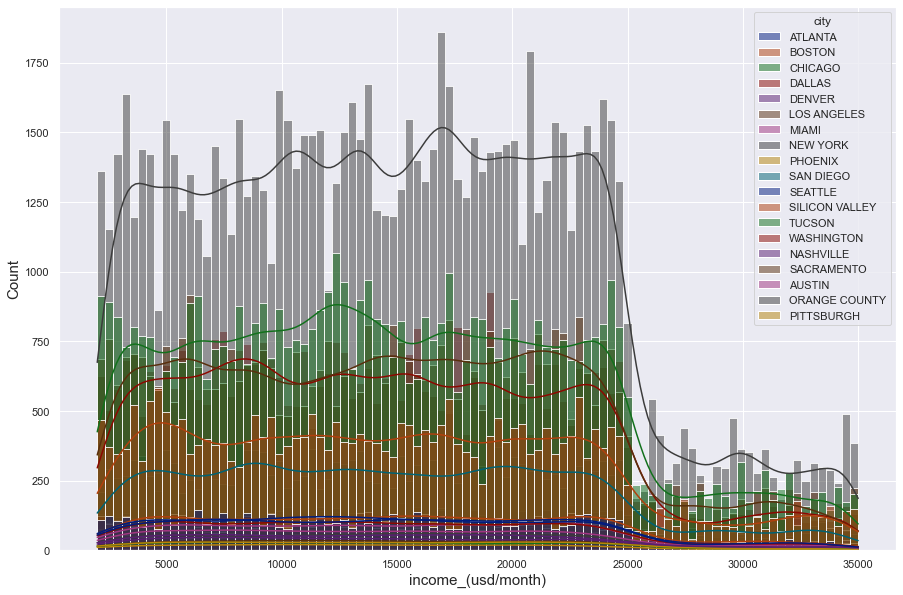

In [116]:
#Distribution of Customer Income

plt.figure(figsize = (15,10))
sns.histplot(x = 'income_(usd/month)', kde = True, hue = 'city', data = full_df, palette='dark');

Just like age variable, the income of customers across all states follows a uniform distribution, signifying that there is an equal probability of finding customers belonging to allranges of salary.

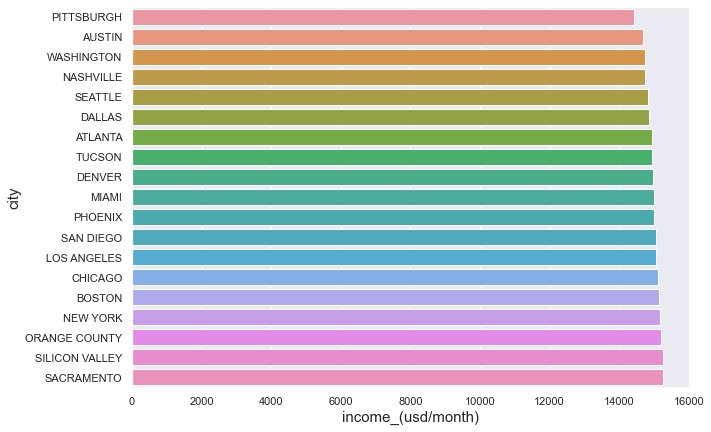

In [119]:
plt.figure(figsize = (10,7))

income_city = full_df.groupby('city').mean()['income_(usd/month)'].to_frame().reset_index().\
                                                            sort_values('income_(usd/month)')

sns.barplot(y = 'city', x = 'income_(usd/month)', data = income_city);

Customers from Silicon Valley and Sacremento has the highest mean salary. Even still the difference of mean salary across all states is very minimal.

##### Is there a relation between customer's income and the number of times the customer uses a Cab service?
We try to answer this question in the coming section.

In [140]:
#Creating a dataset that displays customer id, customer's income and total number of times the 
#customer has made the trip.

customer_income_trip_df = full_df[[
    'customer_id', 'income_(usd/month)'
]].merge(full_df.groupby('customer_id').count()[['city']].reset_index())

customer_income_trip_df.drop_duplicates(inplace = True, ignore_index = True)

customer_income_trip_df.columns = ['customer_id', 'income_(usd/month)', 'total_trips']

customer_income_trip_df

customer_id  income_(usd/month)  total_trips
0            28712               11242            4
1            58925               26550            8
2            58551               21734           11
3             4289               28719           20
4             5734               22475           16
...            ...                 ...          ...
46143        45644               23014            1
46144        15270               19636            1
46145        50921               18698            1
46146        46512               16996            1
46147        36141               14944            1

[46148 rows x 3 columns]

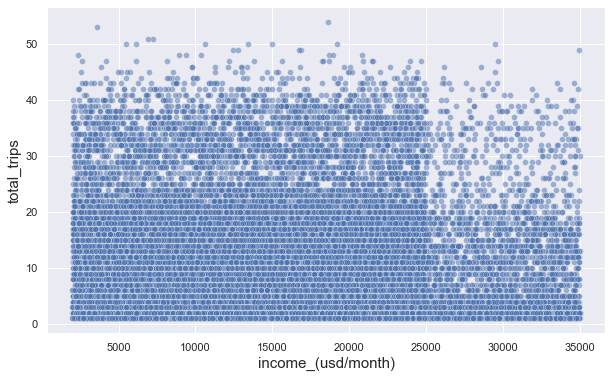

In [150]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'income_(usd/month)', y = 'total_trips', data = customer_income_trip_df, 
               alpha = 0.5);

According to the data in hand, there is absolutly no correlation between a customer's income and the number of time a customer's travel using Cabs.

##### Which Cab company has the most loyal customers?

In [178]:
loyal_cust = full_df.groupby(['customer_id', 'company']).count()[['city']].reset_index()
loyal_cust.columns = ['customer_id', 'company', 'total_trips']
loyal_cust

customer_id     company  total_trips
0                1    Pink Cab            4
1                1  Yellow Cab           25
2                2    Pink Cab            4
3                2  Yellow Cab           36
4                3    Pink Cab            6
...            ...         ...          ...
72221        59998  Yellow Cab            6
72222        59999    Pink Cab            2
72223        59999  Yellow Cab            6
72224        60000    Pink Cab            4
72225        60000  Yellow Cab           14

[72226 rows x 3 columns]

In [179]:
#identifying loyal customer's that has utilized a particular Cab company atleast 5 times.

loyal_cust['is_loyal_five'] = np.where(loyal_cust_5['total_trips'] >= 5, 'Loyal', 'Not Loyal')
loyal_cust

customer_id     company  total_trips is_loyal_five
0                1    Pink Cab            4     Not Loyal
1                1  Yellow Cab           25         Loyal
2                2    Pink Cab            4     Not Loyal
3                2  Yellow Cab           36         Loyal
4                3    Pink Cab            6         Loyal
...            ...         ...          ...           ...
72221        59998  Yellow Cab            6         Loyal
72222        59999    Pink Cab            2     Not Loyal
72223        59999  Yellow Cab            6         Loyal
72224        60000    Pink Cab            4     Not Loyal
72225        60000  Yellow Cab           14         Loyal

[72226 rows x 4 columns]

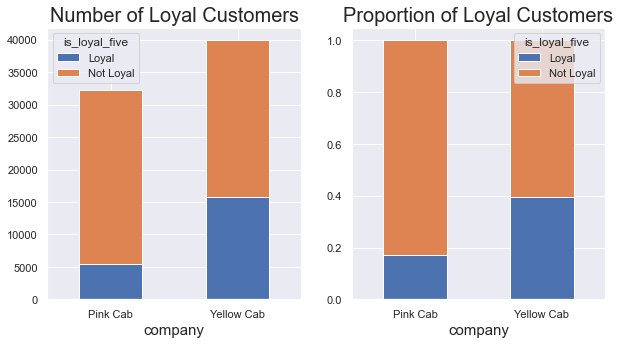

In [180]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(
    index = loyal_cust.company, 
    columns = loyal_cust.is_loyal_five
).plot(kind = 'bar', rot = 0, stacked = True, title = "Number of Loyal Customers", ax = ax[0]);

pd.crosstab(
    index = loyal_cust.company, 
    columns = loyal_cust.is_loyal_five, 
    normalize = 'index'
).plot(kind = 'bar', rot = 0, stacked = True, title = "Proportion of Loyal Customers", ax = ax[1]);

From the above plots, its clear that **$\color{yellow}{\text{Yellow Cab}}$** customer's have more loyal customer's who has used the company's services atleast 5 times compared to  **$\color{violet}{\text{Pink Cab}}$** company.

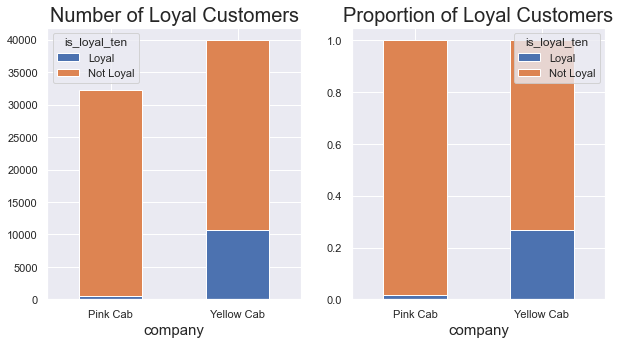

In [301]:
#identifying loyal customer's that has utilized a particular Cab company atleast 10 times.

loyal_cust['is_loyal_ten'] = np.where(loyal_cust_5['total_trips'] >= 10, 'Loyal', 'Not Loyal')

fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(
    index = loyal_cust.company, 
    columns = loyal_cust.is_loyal_ten
).plot(kind = 'bar', rot = 0, stacked = True, title = "Number of Loyal Customers", ax = ax[0]);

pd.crosstab(
    index = loyal_cust.company, 
    columns = loyal_cust.is_loyal_ten, 
    normalize = 'index'
).plot(kind = 'bar', rot = 0, stacked = True, title = "Proportion of Loyal Customers", ax = ax[1]);

Same as before, **$\color{yellow}{\text{Yellow Cab}}$** customer's have more loyal customer's who has used the company's services atleast 10 times compared to  **$\color{violet}{\text{Pink Cab}}$** company.

#### How many rider's are there per city?

In [211]:
#Number of riders per city

total_city_cust = full_df.groupby(['city', 'customer_id']).count()[['company']].\
                                                    count(level = 0).reset_index().sort_values('company')

total_city_cust.columns = ['city', 'total_customers']
total_city_cust

city  total_customers
12      PITTSBURGH             1068
17          TUCSON             1411
11         PHOENIX             1515
13      SACRAMENTO             1633
8        NASHVILLE             1869
5           DENVER             2171
10   ORANGE COUNTY             2216
1           AUSTIN             2419
7            MIAMI             2680
4           DALLAS             2743
0          ATLANTA             2780
15         SEATTLE             2811
16  SILICON VALLEY             2834
14       SAN DIEGO             2998
9         NEW YORK             3000
3          CHICAGO             3000
2           BOSTON             3000
6      LOS ANGELES             3000
18      WASHINGTON             3000

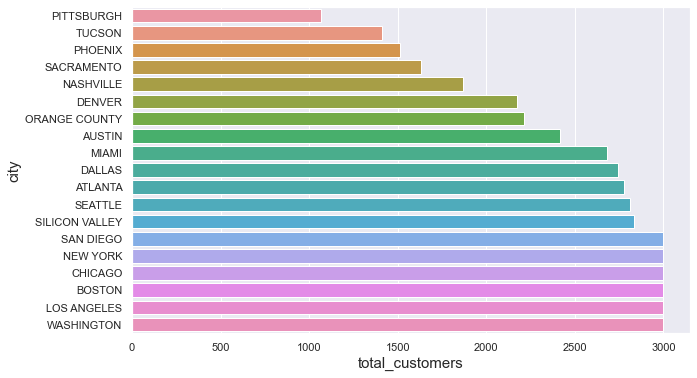

In [212]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'total_customers', y = 'city', data = total_city_cust);

Across all the years, the city with the most riders are in Los Angeles, WAshington, Boston, Chicago, New York and Sandiego. The city with the lowest riders are in the city of Pittsburg.

In [264]:
#Annual Customer growth by company

yearly_cust_growth = full_df.groupby(['city', 'year', 'company']).agg({'customer_id':'nunique'}).\
                                                                                    reset_index()

yearly_cust_growth

city  year     company  customer_id
0       ATLANTA  2016    Pink Cab          477
1       ATLANTA  2016  Yellow Cab         1321
2       ATLANTA  2017    Pink Cab          577
3       ATLANTA  2017  Yellow Cab         1518
4       ATLANTA  2018    Pink Cab          545
..          ...   ...         ...          ...
109  WASHINGTON  2016  Yellow Cab         2944
110  WASHINGTON  2017    Pink Cab         1059
111  WASHINGTON  2017  Yellow Cab         2966
112  WASHINGTON  2018    Pink Cab         1044
113  WASHINGTON  2018  Yellow Cab         2959

[114 rows x 4 columns]

In [ ]:
yearly_cust_growth

In [272]:
# sns.catplot(x = 'year', y = 'customer_id', hue = 'company', row = 'city', data = yearly_cust_growth);

yearly_cust_growth.query("city == 'ATLANTA'")

city  year     company  customer_id
0  ATLANTA  2016    Pink Cab          477
1  ATLANTA  2016  Yellow Cab         1321
2  ATLANTA  2017    Pink Cab          577
3  ATLANTA  2017  Yellow Cab         1518
4  ATLANTA  2018    Pink Cab          545
5  ATLANTA  2018  Yellow Cab         1452

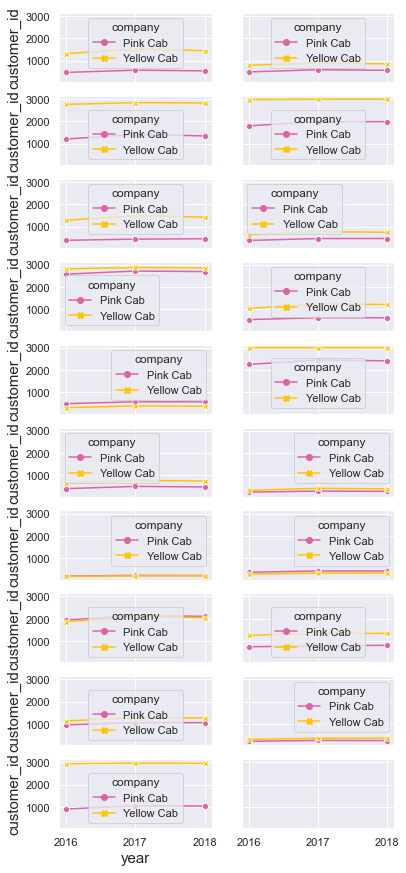

In [300]:
fig, axes = plt.subplots(10,2, figsize = (6,15), sharex = True, sharey = True)

for city, ax in zip(yearly_cust_growth.city.unique(), axes.flatten()):
    
    temp_df = yearly_cust_growth.query(f"city == '{city}'")
    
    sns.lineplot(x = 'year', y = 'customer_id', hue = 'company', data = temp_df, 
                 palette = ['#d965a4', '#ffc400'], ax = ax, style="company",
                 markers=True, dashes=False);
    
    

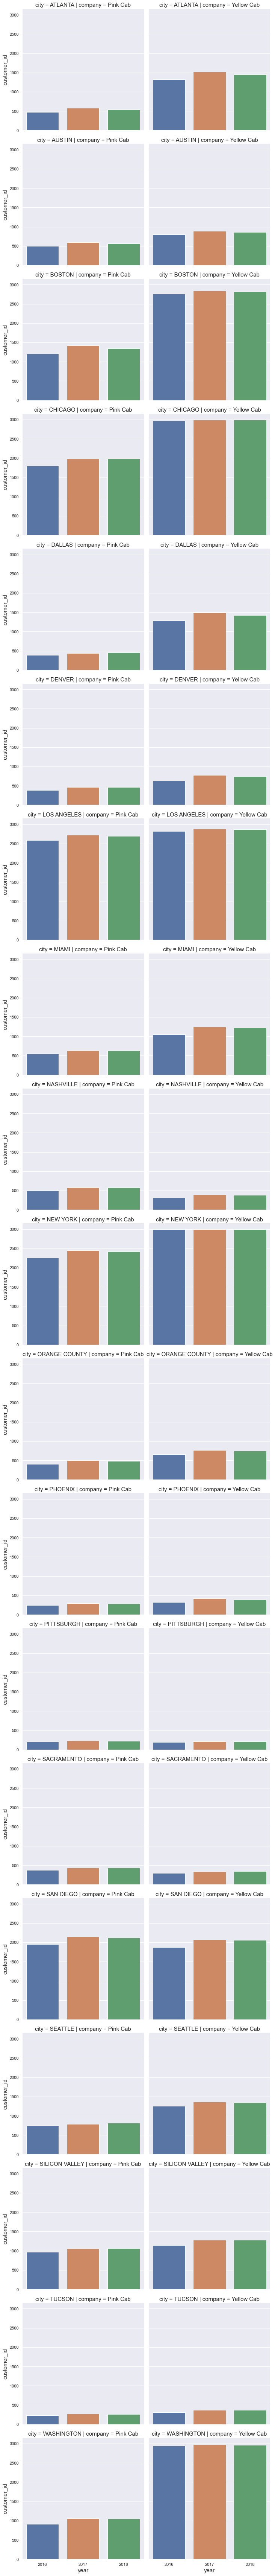

In [310]:
sns.catplot(y = 'customer_id', x = 'year', col = 'company', row = 'city', data = yearly_cust_growth, 
           kind = 'bar');

ACross all the subplots, there was a slight growth of customer's from 2016 to 2017 but then lowered slightly from 2017 to 2018.